In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from shapely.geometry import Point
from shapely.geometry import MultiPoint

伦敦边界的CRS是基于OSGB36 / British National Grid。EPSG:4326是一种常用的全球参考系统，你可以将伦敦边界的数据转化为EPSG:4326。

C:\Users\84398\AppData\Local\Temp/ipykernel_25584/3325976125.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(london_boroughs.geometry.centroid.x, london_boroughs.geometry.centroid.y, london_boroughs['Price_per_square_meter']):


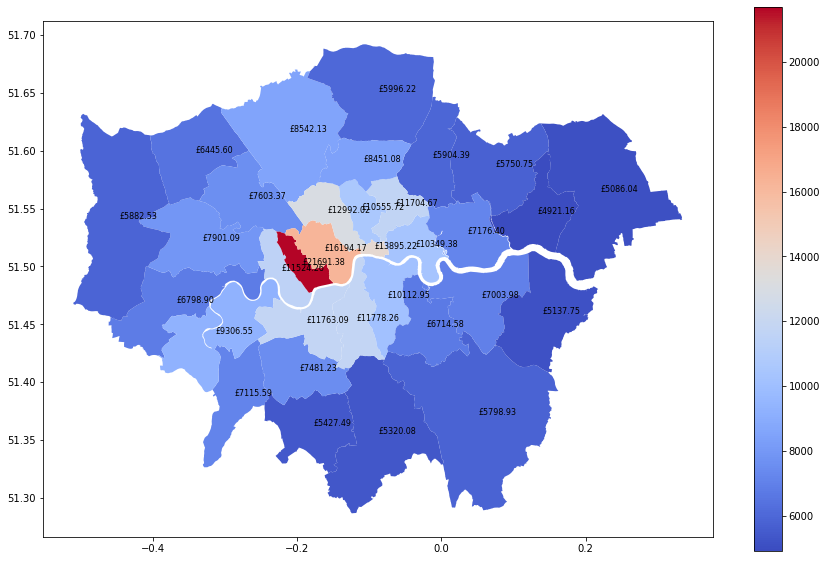

In [3]:

df = pd.read_csv(r"D:\POI data\729_acc\729reclass3_add_distanceToCenter.csv")

# 加载shp文件
london_boroughs = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\london_boundary.shp")

# 改变坐标系为WGS 84
london_boroughs = london_boroughs.to_crs("EPSG:4326")

# 计算每个区的平均 'Price_per_square_meter'
borough_avg_price = df.groupby('borough')['Price_per_square_meter'].mean()


# 将平均价格数据合并到伦敦区的地理数据上
london_boroughs = london_boroughs.set_index('NAME').join(borough_avg_price)

# 创建 choropleth 地图
fig, ax = plt.subplots(1, 1, figsize=(15,10))
london_boroughs.plot(column='Price_per_square_meter', 
                     ax=ax, 
                     legend=True, 
                     cmap='coolwarm')

# 对于每个borough，标注平均房价
for x, y, label in zip(london_boroughs.geometry.centroid.x, london_boroughs.geometry.centroid.y, london_boroughs['Price_per_square_meter']):
    ax.text(x, y, f'£{label:.2f}', fontsize=8)


plt.show()


In [4]:
borough_avg_price

borough
Barking and Dagenham       4921.155618
Barnet                     8542.133428
Bexley                     5137.749665
Brent                      7603.366525
Bromley                    5798.930819
Camden                    12992.015322
City of London            13895.222725
Croydon                    5320.080555
Ealing                     7901.091804
Enfield                    5996.221343
Greenwich                  7003.984355
Hackney                   11704.670588
Hammersmith and Fulham    11524.264929
Haringey                   8451.076083
Harrow                     6445.596802
Havering                   5086.036796
Hillingdon                 5882.532657
Hounslow                   6798.898241
Islington                 10555.719401
Kensington and Chelsea    21691.381425
Kingston upon Thames       7115.587614
Lambeth                   11778.257727
Lewisham                   6714.575163
Merton                     7481.231026
Newham                     7176.403373
Redbridge        

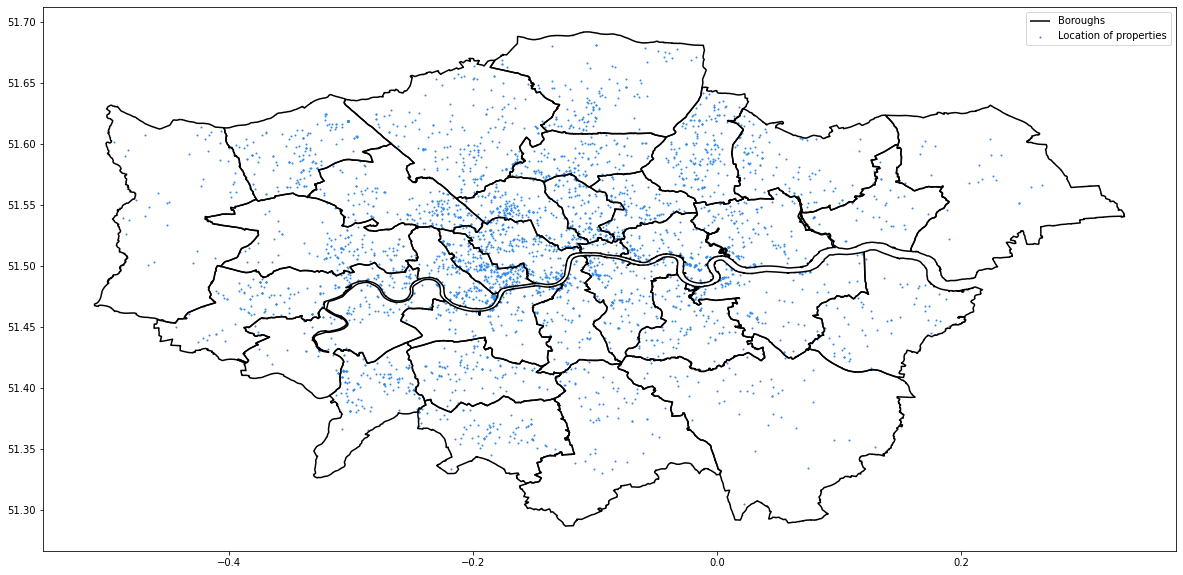

In [5]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point


geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# 获取 london_boroughs 的边界范围
bounds = london_boroughs.total_bounds
width = bounds[2] - bounds[0]
height = bounds[3] - bounds[1]

# 根据 london_boroughs 的边界范围设置图的大小
fig, ax = plt.subplots(1, 1, figsize=(10*width/height, 10))

london_boroughs.boundary.plot(ax=ax, color='black', label='Boroughs')  # 设置为灰色，并添加标签
geo_df.plot(ax=ax, markersize=1, color='#358CEA', label='Location of properties')  # 设置点的颜色为蓝色，并添加标签



# 添加图例
plt.legend()

plt.show()



C:\Users\84398\AppData\Local\Temp/ipykernel_25584/746115981.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(london_boroughs.geometry.centroid.x, london_boroughs.geometry.centroid.y, london_boroughs.index):


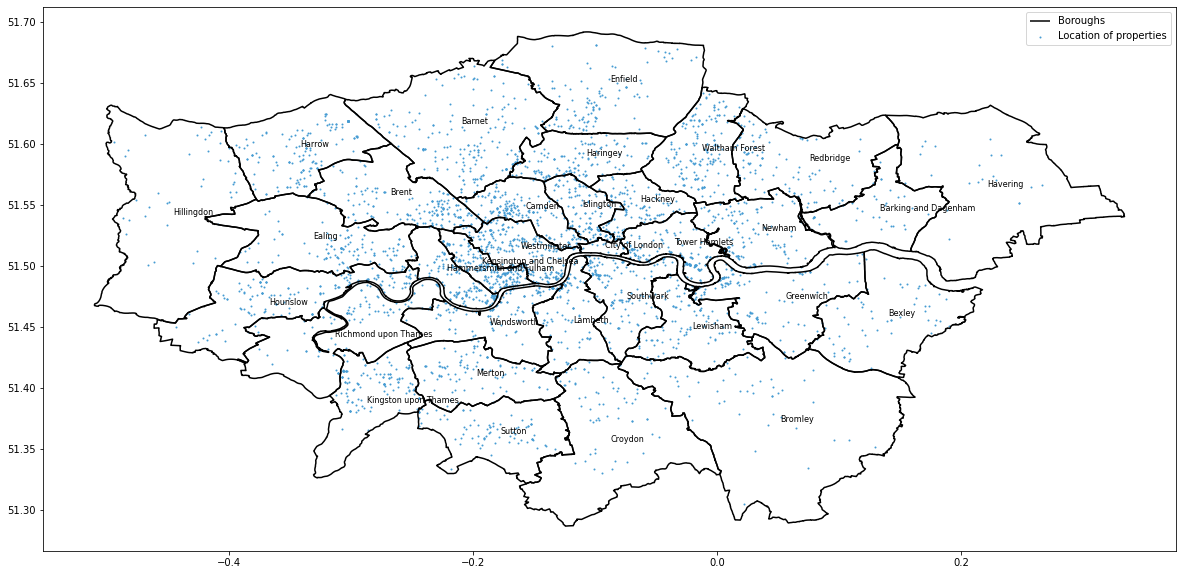

In [6]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# 获取 london_boroughs 的边界范围
bounds = london_boroughs.total_bounds
width = bounds[2] - bounds[0]
height = bounds[3] - bounds[1]

# 根据 london_boroughs 的边界范围设置图的大小
fig, ax = plt.subplots(1, 1, figsize=(10*width/height, 10))

london_boroughs.boundary.plot(ax=ax, color='black', label='Boroughs')  # 设置为灰色，并添加标签
geo_df.plot(ax=ax, markersize=1, color='#469CD3', label='Location of properties')  # 设置点的颜色为蓝色，并添加标签

# 在每个borough的几何中心点上打印borough的名称
for x, y, label in zip(london_boroughs.geometry.centroid.x, london_boroughs.geometry.centroid.y, london_boroughs.index):
    ax.text(x, y, label, fontsize=8)

# 添加图例
plt.legend()

plt.show()


---
计算每个 borough 中点的密度

In [7]:
# 读取数据
df = pd.read_csv(r"D:\POI data\729_acc\729reclass3_add_distanceToCenter.csv")
london_boroughs = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\london_boundary.shp")

# 将 df 转换为 GeoDataFrame
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# 设置 GeoDataFrame 的坐标参考系统 (CRS) 以匹配 london_boroughs 的 CRS
geo_df.crs = london_boroughs.crs

# 计算每个 borough 中点的数量
borough_point_counts = gpd.sjoin(geo_df, london_boroughs, op='within').groupby('index_right').size()
london_boroughs['counts'] = borough_point_counts

# 将坐标参考系统转换为EPSG:27700
london_boroughs = london_boroughs.to_crs(epsg=27700)
# 计算每个 borough 的面积（平方米）
london_boroughs['area'] = london_boroughs.geometry.area

# 将面积从平方米转换为平方公里
london_boroughs['area_km2'] = london_boroughs['area'] / 1e6

# 使用平方公里计算点密度
london_boroughs['density'] = borough_point_counts.values / london_boroughs['area_km2']

print(london_boroughs[['NAME', 'counts', 'area_km2', 'density']])


                      NAME  counts    area_km2    density
0     Kingston upon Thames     117   37.261178   3.139997
1                  Croydon      60   86.494436   0.693686
2                  Bromley      47  150.134858   0.313052
3                 Hounslow     153   55.926233   2.735747
4                   Ealing     118   55.544350   2.124429
5                 Havering      21  112.349669   0.186916
6               Hillingdon      39  115.700544   0.337077
7                   Harrow     148   50.463301   2.932824
8                    Brent     163   43.232640   3.770299
9                   Barnet     186   86.748314   2.144134
10                 Lambeth      96   26.810042   3.580748
11               Southwark     144   28.862036   4.989253
12                Lewisham      89   35.149085   2.532072
13               Greenwich     117   47.334073   2.471792
14                  Bexley      55   60.580234   0.907887
15                 Enfield     107   82.200191   1.301700
16          Wa

c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [8]:

# 获取密度最大的borough
max_density_borough = london_boroughs[london_boroughs['density'] == london_boroughs['density'].max()]

# 获取密度最小的borough
min_density_borough = london_boroughs[london_boroughs['density'] == london_boroughs['density'].min()]

# 打印结果，确保不使用科学计数法
print(f"密度最高的borough的密度是: {max_density_borough['density'].values[0]:.2f} 在 {max_density_borough['NAME'].values[0]}")
print(f"密度最低的borough的密度是: {min_density_borough['density'].values[0]:.2f} 在 {min_density_borough['NAME'].values[0]}")


密度最高的borough的密度是: 17.98 在 Kensington and Chelsea
密度最低的borough的密度是: 0.19 在 Havering


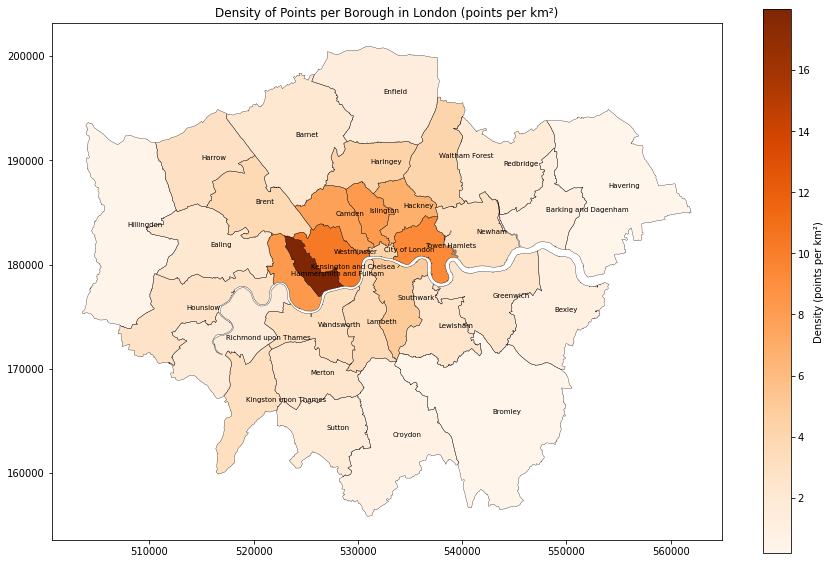

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
london_boroughs.boundary.plot(ax=ax, color='black', label='Boroughs', linewidth=0.3)  # 设置为灰色，并添加标签
london_boroughs.plot(column='density', ax=ax, legend=True, cmap="Oranges", legend_kwds={'label': "Density (points per km²)"})
for x, y, label in zip(london_boroughs.geometry.centroid.x, london_boroughs.geometry.centroid.y, london_boroughs['NAME']):
    ax.text(x, y, label, fontsize=7)


plt.title('Density of Points per Borough in London (points per km²)')
plt.show()


---

(部分)poi点,缺失点的borough:Havering,Enfield

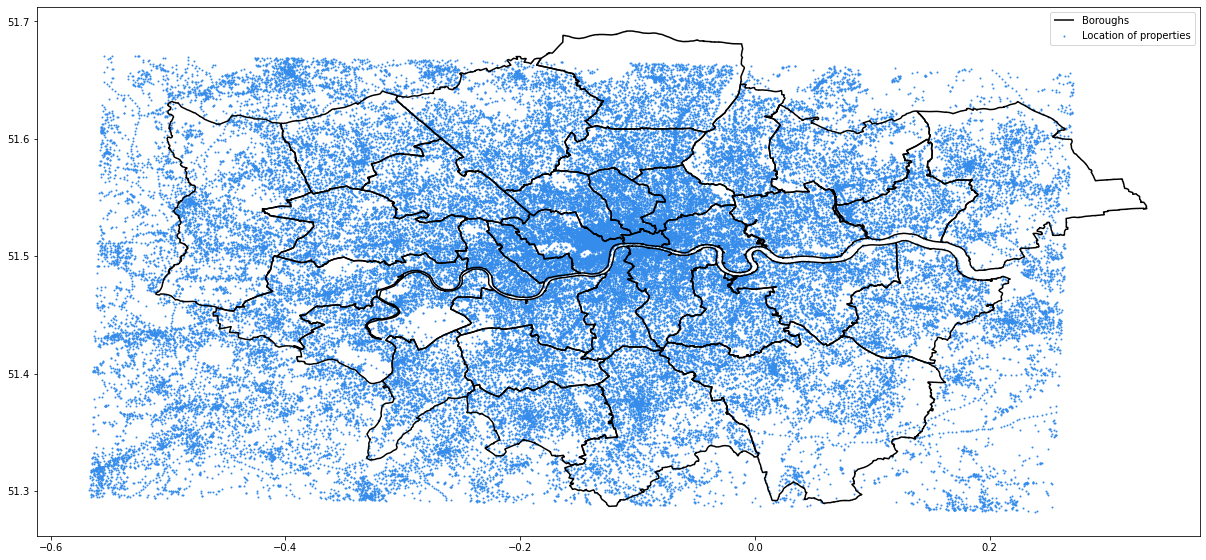

In [10]:
london_boroughs = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\london_boundary.shp")
df = pd.read_csv(r"D:\POI data\poi_cleaned_data\728_changeclass_7acc_poi.csv")


geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# 获取 london_boroughs 的边界范围
bounds = london_boroughs.total_bounds
width = bounds[2] - bounds[0]
height = bounds[3] - bounds[1]

# 根据 london_boroughs 的边界范围设置图的大小
fig, ax = plt.subplots(1, 1, figsize=(10*width/height, 10))

london_boroughs.boundary.plot(ax=ax, color='black', label='Boroughs')  # 设置为灰色，并添加标签
geo_df.plot(ax=ax, markersize=1, color='#358CEA', label='Location of properties')  # 设置点的颜色为蓝色，并添加标签



# 添加图例
plt.legend()

plt.show()

---

处理邮编区

In [11]:


# 加载Shapefile文件
data = gpd.read_file(r"D:\POI data\ONS 邮政编码目录 (ONSPD)\DS_10283_2597\GB_Postcodes\GB_Postcodes\PostalDistrict.shp")

# 查看列
print(data.columns)


Index(['DistID', 'PostDist', 'PostArea', 'DistNum', 'PCCnt', 'AnomCnt',
       'RefPC', 'x', 'y', 'Sprawl', 'Locale', 'geometry'],
      dtype='object')


加载文件"D:\POI data\729_acc\729reclass3_add_allpostcode.csv"，它有一列为postcode,有一些是完整的邮编例如IG11 8AD，有一些只有邮政区号例如RM8。所以新建一列“PostDist”，值为“postcode”列中的邮政区号例如IG11，RM8

df['postcode'].str.extract(r'(\D+\d+)') 是使用正则表达式提取邮政区号。这个正则表达式 (\D+\d+) 的意思是匹配一个或多个非数字字符 (\D+) 后面跟着一个或多个数字字符 (\d+)。因此，它将匹配英国邮政编码的区号部分（例如 "IG11" 或 "RM8"）。

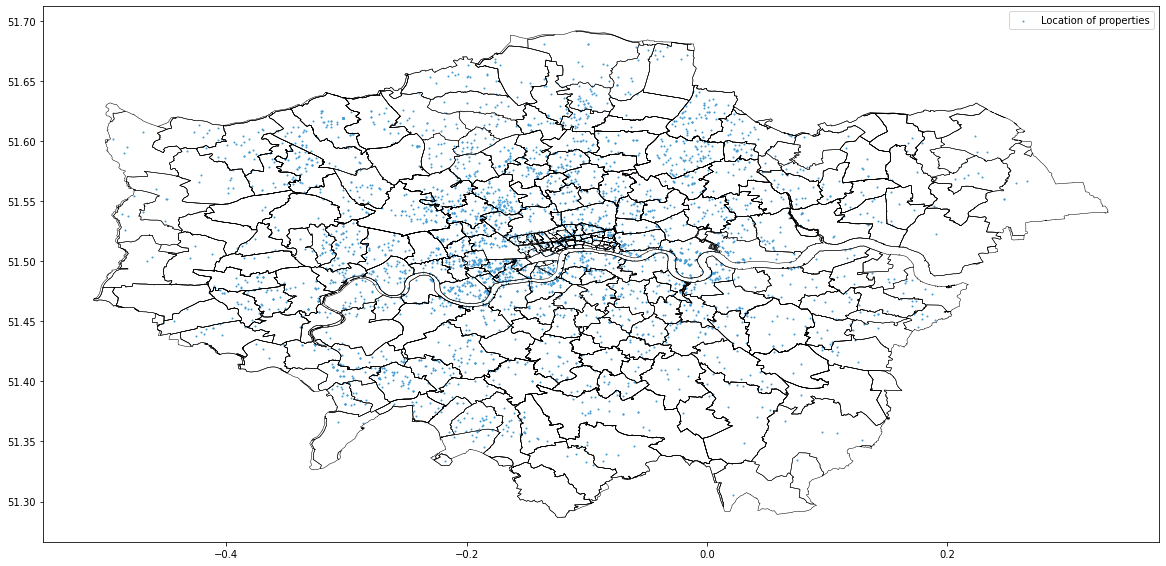

In [12]:

# 加载Shapefile文件
clipped_postcodes = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\clipped_postcodes.shp")
london_boundary = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\london_boundary.shp")
df = pd.read_csv(r"D:\POI data\729_acc\729reclass3_add_allpostcode_with_postdist.csv")

# 创建一个由Point对象组成的列
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]

# 转换DataFrame为GeoDataFrame
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# # 基于 "PostDist" 列来联接数据,有8000多条不知道为什么
# merged = pd.merge(geo_df, clipped_postcodes, on='PostDist')

# # 创建一个新的 GeoDataFrame，它包含每个点和其匹配的邮政编码地区的几何属性
# gdf_merged = gpd.GeoDataFrame(merged, geometry='geometry_x')

# 绘制伦敦边界和邮政编码地图
ig, ax = plt.subplots(1, 1, figsize=(20, 20)) 
clipped_postcodes.boundary.plot(ax=ax, color='black', linewidth=0.5)

# 绘制点数据
#geo_df.plot(ax=ax, markersize=2, color='#469CD3')

#london_boroughs.boundary.plot(ax=ax, color='#49606F', label='Post districts')  # 设置为灰色，并添加标签
geo_df.plot(ax=ax, markersize=1, color='#469CD3', label='Location of properties')  # 设置点的颜色为蓝色，并添加标签


# 添加图例
plt.legend()

plt.show()


In [13]:
# 加载Shapefile文件
clipped_postcodes = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\clipped_postcodes.shp")
df = pd.read_csv(r"D:\POI data\729_acc\729reclass3_add_allpostcode_with_postdist.csv")
# 1. 转换DataFrame到GeoDataFrame
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# 2. 设置坐标参考系统 (CRS)
geo_df.crs = clipped_postcodes.crs

# 3. 空间连接
joined_data = gpd.sjoin(geo_df, clipped_postcodes, op='within')

# 4. 计算每个post district中的点数
post_point_counts = joined_data.groupby('index_right').size()
clipped_postcodes['counts'] = post_point_counts

# 将坐标参考系统转换为EPSG:27700
clipped_postcodes = clipped_postcodes.to_crs(epsg=27700)
# 计算每个 borough 的面积（平方米）
clipped_postcodes['area'] = clipped_postcodes.geometry.area

# 将面积从平方米转换为平方公里
clipped_postcodes['area_km2'] = clipped_postcodes['area'] / 1e6

clipped_postcodes['density'] = clipped_postcodes['counts'] / clipped_postcodes['area_km2']

print(clipped_postcodes[['counts', 'area_km2', 'density']])  # Assuming 'NAME' is the name of the post district


c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


     counts   area_km2   density
0       1.0  15.667877  0.063825
1       2.0   7.817266  0.255844
2       2.0   7.817266  0.255844
3      11.0  25.005086  0.439910
4      11.0  25.005086  0.439910
..      ...        ...       ...
593    11.0   7.995563  1.375763
594     9.0  12.279878  0.732906
595     9.0  12.279878  0.732906
596     NaN   0.548693       NaN
597     NaN   0.332515       NaN

[598 rows x 3 columns]


In [14]:
print(clipped_postcodes['density'].max())
print(clipped_postcodes['density'].min())


66.03105905346068
0.04600157450079843


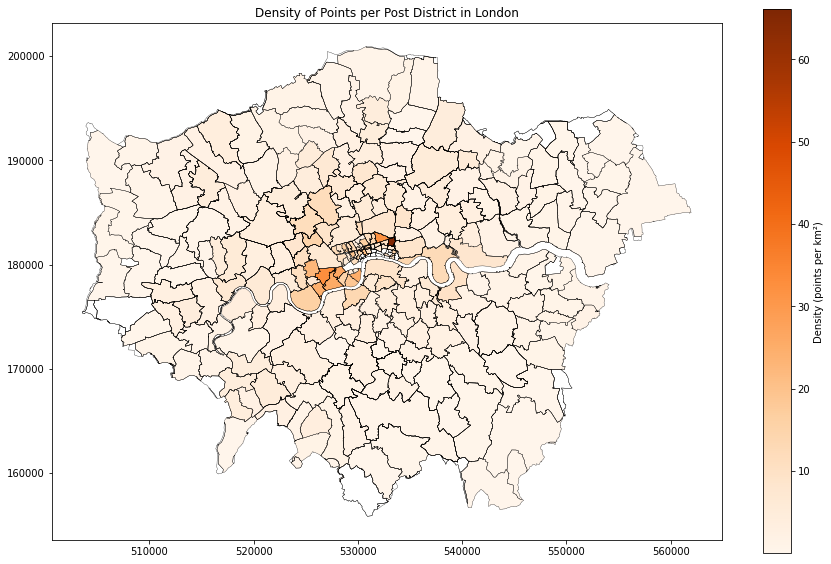

In [15]:
import matplotlib.pyplot as plt

# 设置图大小和坐标轴
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# 用密度数据为每个post district上色
clipped_postcodes.plot(column='density', ax=ax, legend=True, cmap="Oranges", legend_kwds={'label': "Density (points per km²)"})

clipped_postcodes.boundary.plot(ax=ax, color='black', linewidth=0.3)

# 设置标题
plt.title('Density of Points per Post District in London')

# 显示图
plt.show()


---

对geo_df以每个PostDist做groupby，然后对每列求平均值。

In [16]:
columns_to_drop = ['address', 'borough', 'postcode', 'property_type', 'tenure', 'geometry']  # 请将 'column1', 'column2', 'column3' 替换为你实际的列名

# 删除这些列
grouped_geo_df = geo_df.drop(columns=columns_to_drop)

# 现在，你可以使用 'PostDist' 列进行分组，并求每列的平均值
grouped_geo_df = grouped_geo_df.groupby('PostDist').mean()


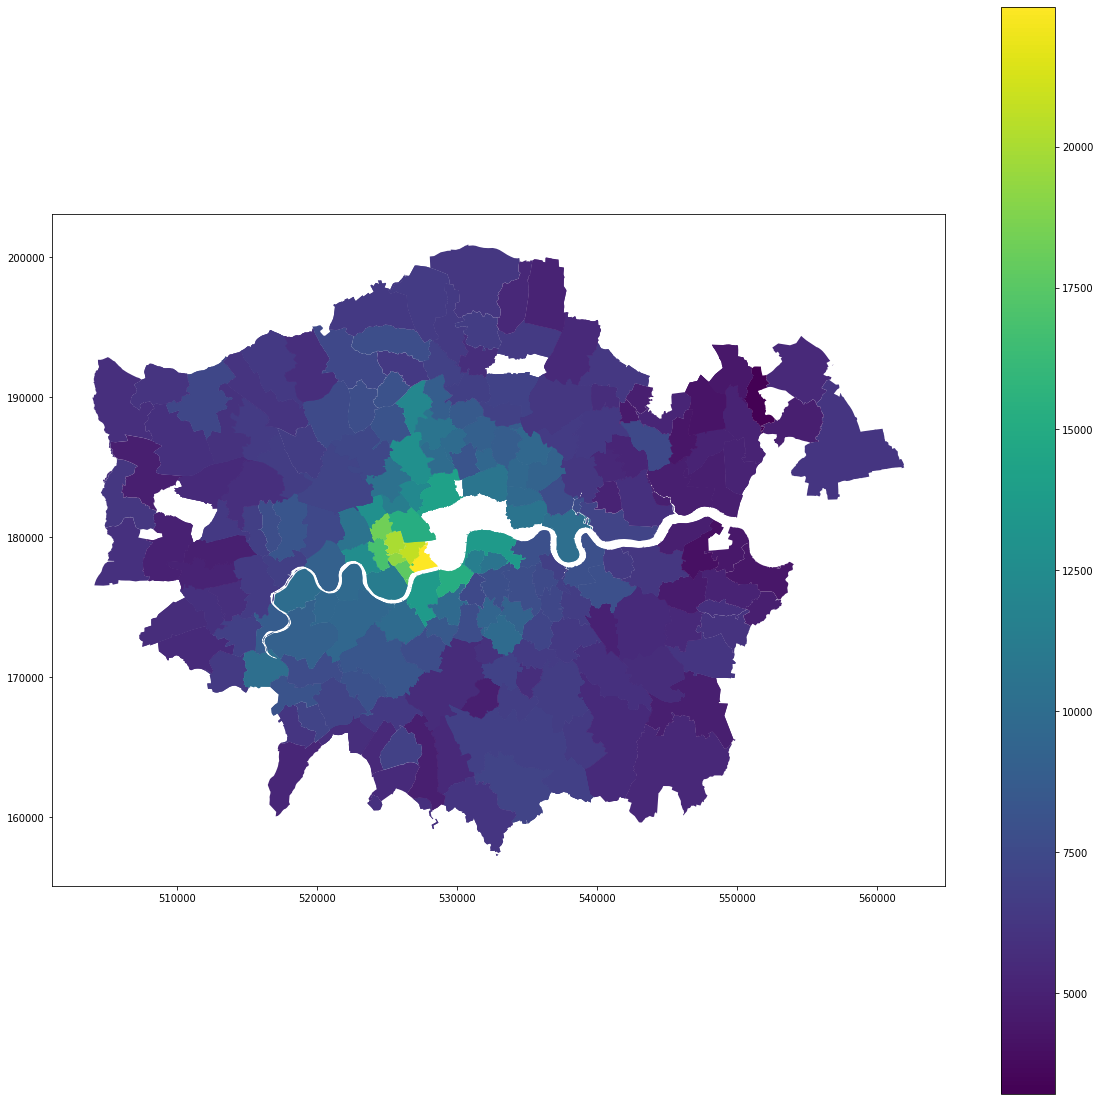

In [17]:
# 合并 clipped_postcodes 和 grouped_geo_df
postcode_merge_price = clipped_postcodes.merge(grouped_geo_df, on='PostDist')

# 绘制地图，颜色代表 'Price_per_square_meter' 列的值
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
postcode_merge_price.plot(column='Price_per_square_meter', ax=ax, legend=True)

plt.show()


In [18]:
City_of_London_df = df[df['borough'] == 'City of London']
# 打印出 City_of_London_df 中 'PostDist' 列的唯一值
print(City_of_London_df['PostDist'].unique())


['EC3' 'EC2' 'EC4' 'EC1' 'E1']


In [19]:
# 在 'grouped_geo_df' 中检查这5个邮编区
for postcode in ['EC3', 'EC2', 'EC4', 'EC1', 'E1']:
    if postcode in grouped_geo_df.index:
        print(f'{postcode} is in grouped_geo_df')
    else:
        print(f'{postcode} is NOT in grouped_geo_df')

# 在底图邮编区中检查这5个邮编区
for postcode in ['EC3', 'EC2', 'EC4', 'EC1', 'E1']:
    if postcode in clipped_postcodes['PostDist'].values:
        print(f'{postcode} is in london_postcodes')
    else:
        print(f'{postcode} is NOT in london_postcodes')


EC3 is in grouped_geo_df
EC2 is in grouped_geo_df
EC4 is in grouped_geo_df
EC1 is in grouped_geo_df
E1 is in grouped_geo_df
EC3 is NOT in london_postcodes
EC2 is NOT in london_postcodes
EC4 is NOT in london_postcodes
EC1 is NOT in london_postcodes
E1 is in london_postcodes


In [20]:
# 获取PostDist列值为NaN的所有行
df_nan_PostDist = df[df['PostDist'].isnull()]


In [21]:
# 把两个列的唯一值转化为集合
df_PostDist_set = set(df['PostDist'].unique())
clipped_postcodes_PostDist_set = set(clipped_postcodes['PostDist'].unique())

# 计算重叠部分
overlap = df_PostDist_set & clipped_postcodes_PostDist_set
print("Overlap:", overlap)

# 计算不重叠的部分
non_overlap_df = df_PostDist_set - clipped_postcodes_PostDist_set
non_overlap_clipped_postcodes = clipped_postcodes_PostDist_set - df_PostDist_set

print("Non-overlap in df:", non_overlap_df)
print("Non-overlap in clipped_postcodes:", non_overlap_clipped_postcodes)


Overlap: {'NW9', 'KT6', 'RM9', 'TW12', 'SW7', 'N17', 'N10', 'HA7', 'SE22', 'SW9', 'SE21', 'UB1', 'RM5', 'W14', 'BR3', 'UB8', 'RM14', 'W8', 'KT4', 'TW13', 'W10', 'CR8', 'E9', 'E6', 'RM6', 'SW8', 'E4', 'NW2', 'E18', 'SW15', 'NW1', 'N14', 'NW8', 'N19', 'NW4', 'SW12', 'SE20', 'HA3', 'CR0', 'SW19', 'SE23', 'DA15', 'SE14', 'SM1', 'W6', 'E3', 'RM10', 'SW3', 'BR5', 'E15', 'E7', 'N3', 'BR6', 'N5', 'KT1', 'TW2', 'SE7', 'SE12', 'UB3', 'SE26', 'KT2', 'RM11', 'N6', 'N13', 'E1', 'CR2', 'N1', 'BR1', 'SW14', 'CR7', 'EN1', 'DA16', 'TW9', 'SE10', 'IG4', 'DA1', 'BR2', 'HA9', 'DA5', 'SE1', 'HA4', 'SW5', 'W9', 'SW6', 'E13', 'RM8', 'SE19', 'DA6', 'NW7', 'IG1', 'TW5', 'SE27', 'W5', 'TW10', 'W13', 'SE25', 'NW3', 'SE3', 'SE28', 'SM2', 'N20', 'HA1', 'SE2', 'SE8', 'N11', 'SE5', 'NW6', 'TW4', 'RM3', 'IG3', 'UB9', 'TW8', 'RM1', 'IG8', 'UB6', 'W11', 'E12', 'N12', 'E2', 'N7', 'E11', 'SE15', 'W2', 'SE24', 'KT9', 'N8', 'SW16', 'SM6', 'KT3', 'DA7', 'N22', 'E5', 'SM4', 'IG5', 'NW11', 'E14', 'UB2', 'CR4', 'N21', 'EN3', '

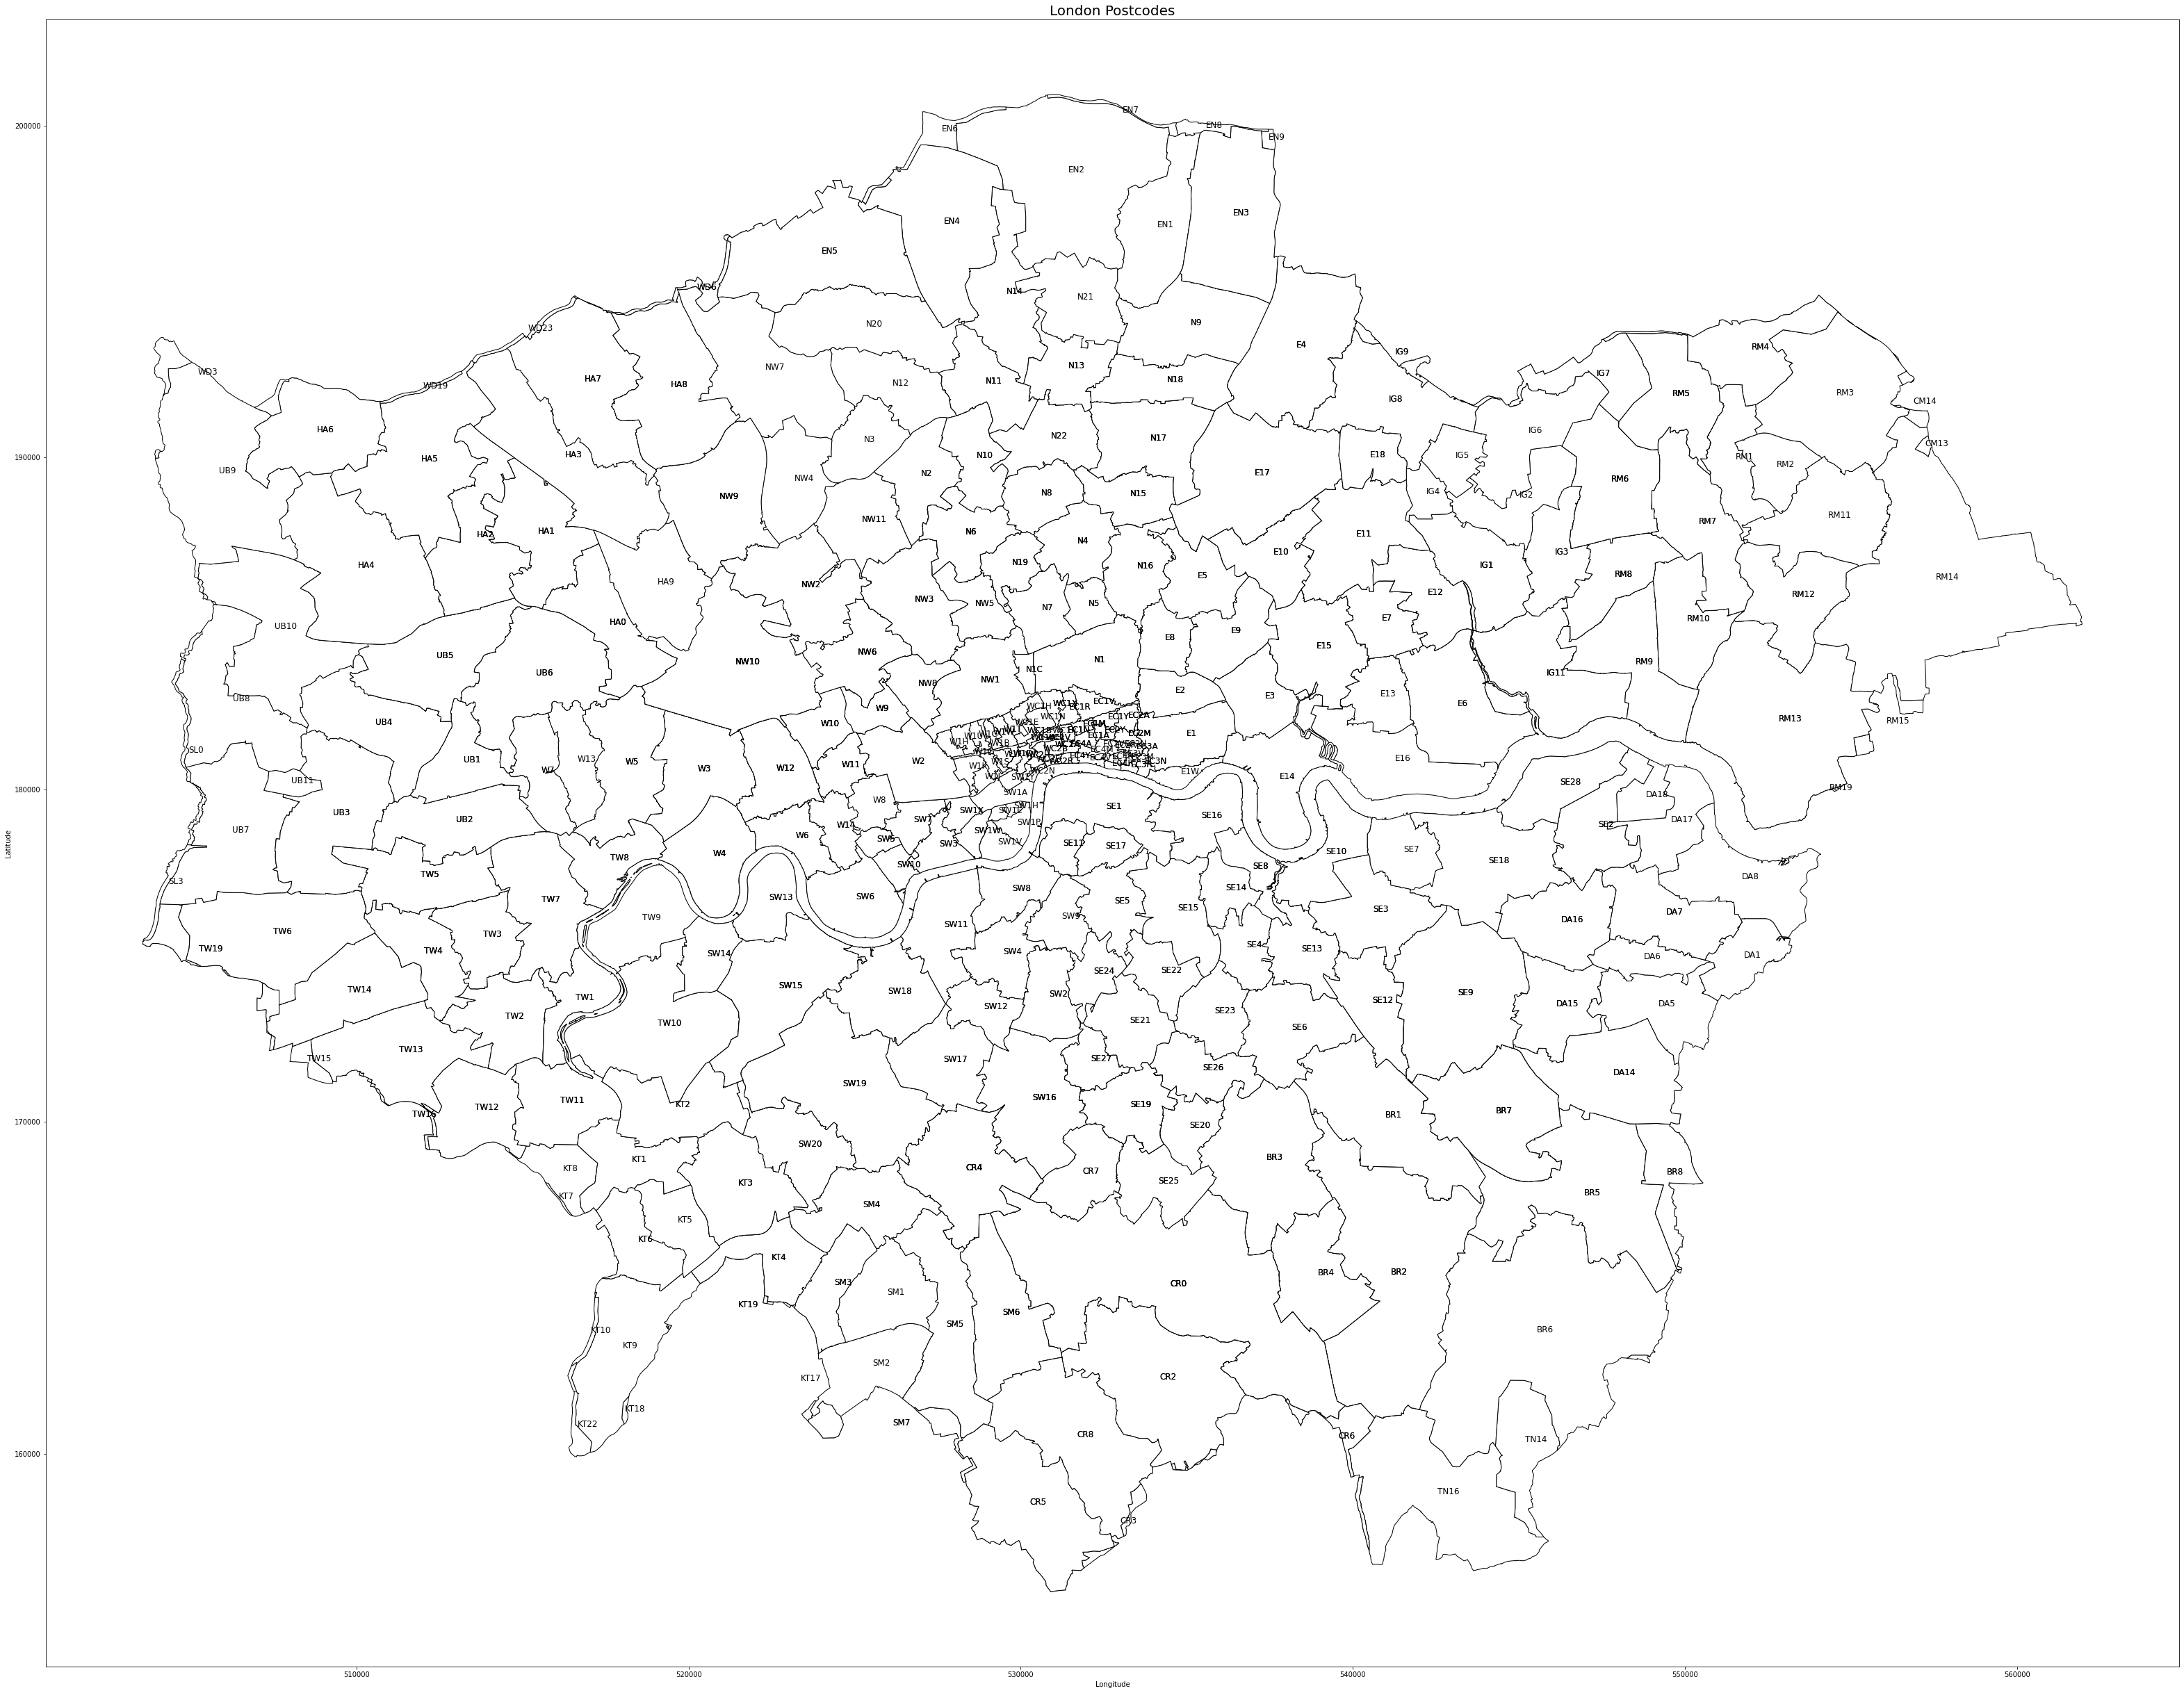

In [22]:

fig, ax = plt.subplots(figsize=(55, 55))

# 画出伦敦的邮编区
clipped_postcodes.plot(ax=ax, edgecolor='black', color='white')

# 计算每个邮编区的中心点，并添加标签
for x, y, label in zip(clipped_postcodes.geometry.centroid.x, clipped_postcodes.geometry.centroid.y, clipped_postcodes['PostDist']):
    ax.text(x, y, label, fontsize=12)

# 设置标题和坐标轴标签
ax.set_title('London Postcodes', fontsize=20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# 显示地图
plt.show()


---

直接根据df经纬度“lat”,"lon"列和clipped_postcodes这个shp,PostDist，并写入PostDist列

你想要保持原始数据框 df 的行数不变，可以在连接后选择一个策略来处理这些多余的行。比如，你可以选择第一个匹配的邮编区域，或者在所有匹配的邮编区域中选择一个最相关的。

In [23]:

# clipped_postcodes = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\clipped_postcodes.shp")
# df = pd.read_csv(r"D:\POI data\729_acc\729reclass3_add_allpostcode_with_postdist.csv")

# # 如果存在的话，从数据框中删除 'PostDist' 列
# if 'PostDist' in df.columns:
#     df = df.drop('PostDist', axis=1)

# # 创建一个新的GeoDataFrame，它的geometry列是Point类型
# # 需要保证 lon 和 lat 是你 DataFrame 中经度和纬度的列名
# geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
# gdf_points = gpd.GeoDataFrame(df, geometry=geometry)

# # 确保两个GeoDataFrame的CRS是一致的
# gdf_points.set_crs("EPSG:4326", inplace=True)
# clipped_postcodes = clipped_postcodes.to_crs("EPSG:4326")

# # 重设两个GeoDataFrame的索引，以避免在空间连接过程中出现错误
# gdf_points.reset_index(drop=True, inplace=True)
# clipped_postcodes.reset_index(drop=True, inplace=True)

# # 执行空间连接，将邮政编码区域信息加入到点的GeoDataFrame中
# joined = gpd.sjoin(gdf_points, clipped_postcodes, how='left', op='within')

# # 对 joined GeoDataFrame 进行分组，以保留每个点的第一个匹配的邮编区域
# joined_grouped = joined.groupby(joined.index).first()

# # 这时 'joined_grouped' GeoDataFrame 包含了原始点数据以及每个点对应的邮政编码区域信息
# # 我们可以将邮政编码区域信息复制回原始的DataFrame
# df['PostDist'] = joined_grouped['PostDist']


有61行为None.伦敦的邮政编码边界可能并不完全涵盖了伦敦所有的地理区域，也就是说，可能存在一些位于伦敦，但是不在邮政编码区域内的点。这可能是因为邮政编码边界并不能完全准确地表示一个城市的地理边界。

如果你确认所有的点都在伦敦内，并且邮政编码数据也是完整的，那么你可能需要对那些没有得到邮政编码的点做一些特殊处理，比如将它们划归到最近的邮政编码区域内。

你可以使用 Nearest Polygon 方法来处理这个问题。

In [24]:
# # 找到所有 PostDist 为空的点
# missing_postdist_points = gdf_points[df['PostDist'].isnull()]

# # 找到 clipped_postcodes 中所有多边形的质心
# clipped_postcodes_centroids = clipped_postcodes.centroid

# # 对于每一个缺失 PostDist 的点，找到最近的多边形质心
# nearest_centroids = missing_postdist_points.geometry.apply(lambda point: clipped_postcodes_centroids.distance(point).idxmin())

# # 将这些点的 PostDist 设置为对应的多边形的 PostDist
# df.loc[missing_postdist_points.index, 'PostDist'] = clipped_postcodes.loc[nearest_centroids, 'PostDist'].values


In [25]:
# df[df['PostDist'].isnull()]

In [26]:
# df.to_csv(r"D:\POI data\729_acc\729reclass3_add_post_byShp.csv", index=False)


---

用新的postdistrict绘制地图

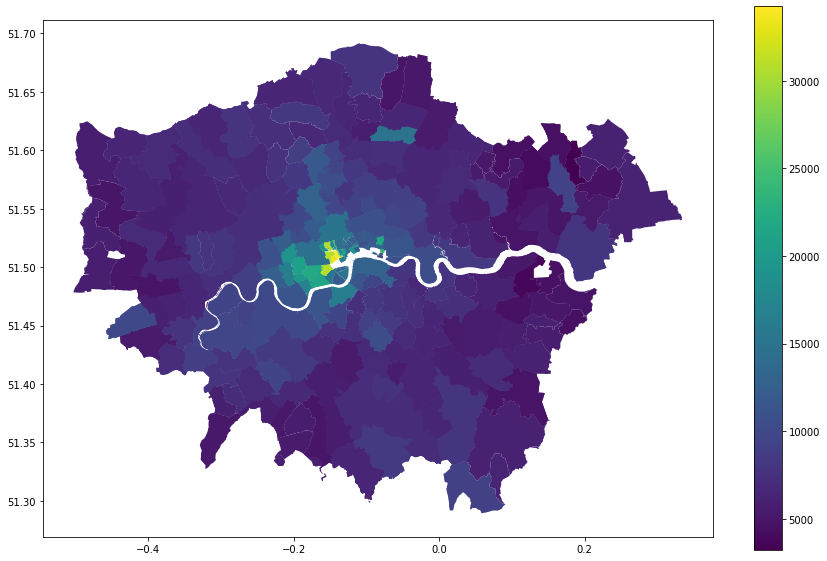

In [27]:

# 加载Shapefile文件
clipped_postcodes = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\clipped_postcodes.shp")
london_boundary = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\london_boundary.shp")
df = pd.read_csv(r"D:\POI data\729_acc\729reclass3_add_post_byShp.csv")

# 创建一个由Point对象组成的列
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]

# 转换DataFrame为GeoDataFrame
geo_df = gpd.GeoDataFrame(df, geometry=geometry)
columns_to_drop = ['address', 'borough', 'postcode', 'property_type', 'tenure', 'geometry']  # 请将 'column1', 'column2', 'column3' 替换为你实际的列名

# 删除这些列
grouped_geo_df = geo_df.drop(columns=columns_to_drop)

# 现在，你可以使用 'PostDist' 列进行分组，并求每列的平均值
grouped_geo_df = grouped_geo_df.groupby('PostDist').mean()

# 合并 clipped_postcodes 和 grouped_geo_df
postcode_merge_price = clipped_postcodes.merge(grouped_geo_df, on='PostDist')

# 绘制地图，颜色代表 'Price_per_square_meter' 列的值
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
postcode_merge_price.plot(column='Price_per_square_meter', ax=ax, legend=True)

plt.show()




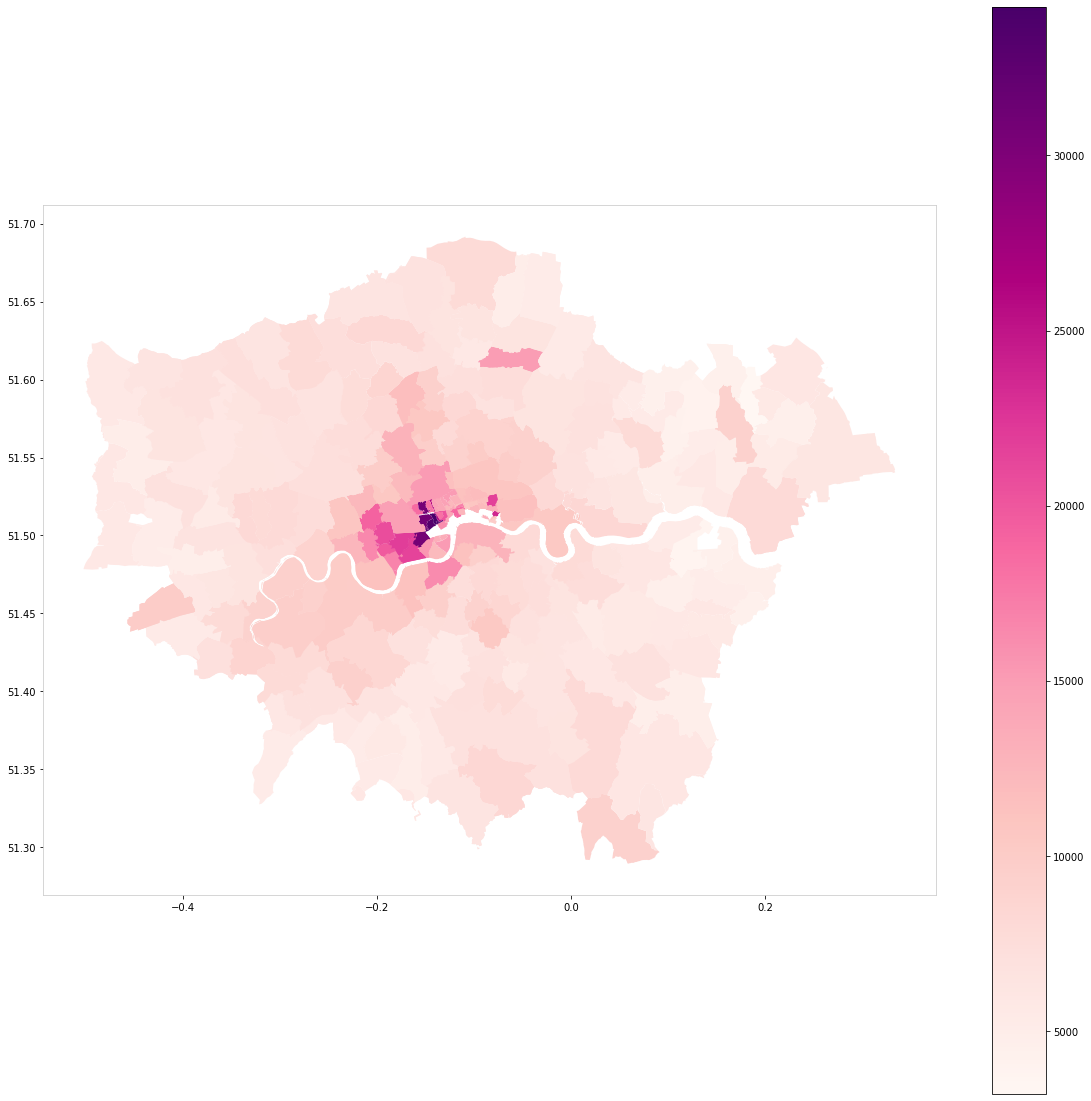

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
postcode_merge_price.plot(column='Price_per_square_meter', ax=ax, legend=True, cmap='RdPu', linewidth=0.8)
plt.setp(ax.spines.values(), color='0.8')  # 设置边缘颜色
plt.show()

可达性

中下部颜色深的那个是因为这块区域，只有一个房子的数据

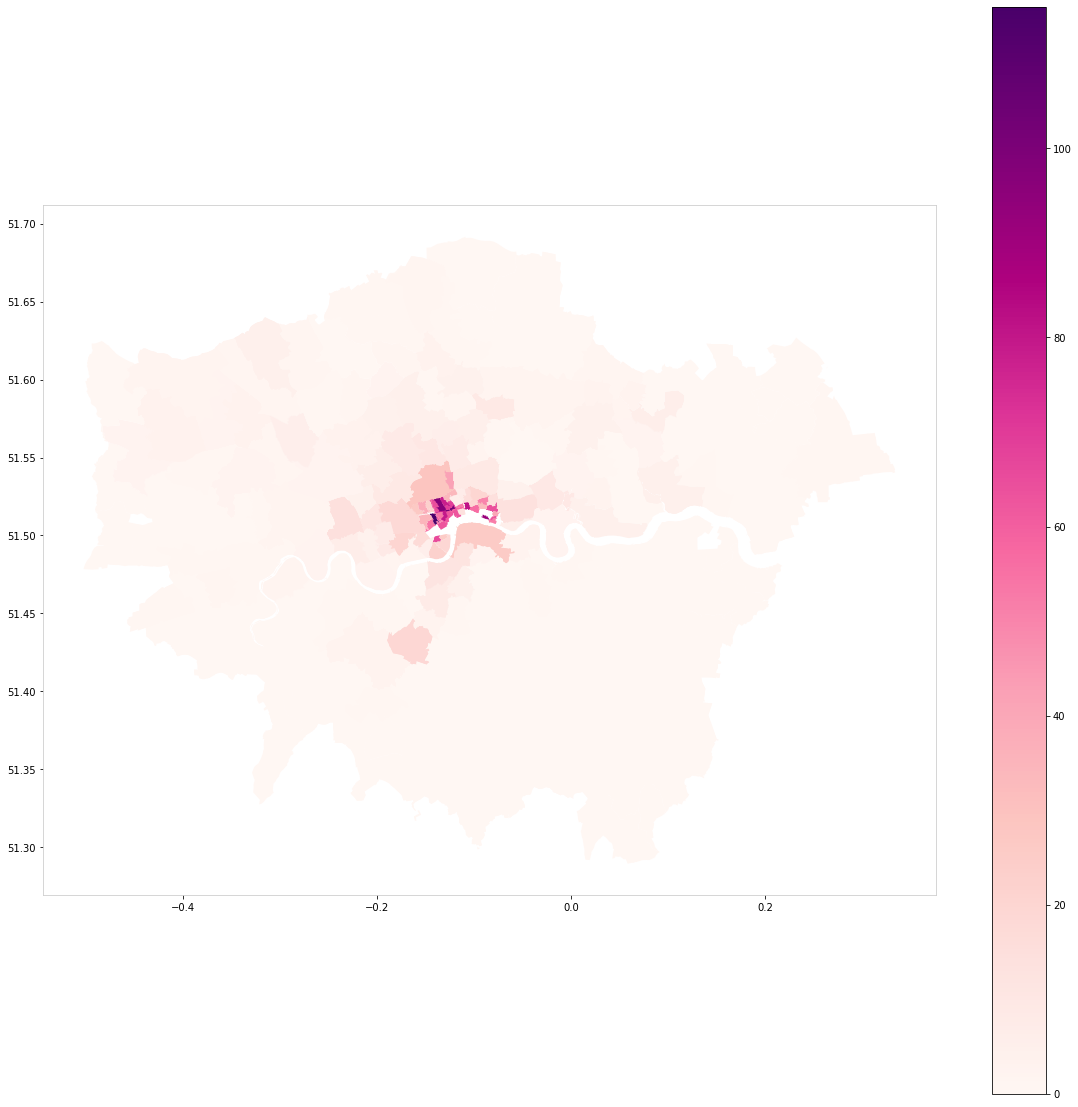

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
postcode_merge_price.plot(column='Underground entranceAccess15m', ax=ax, legend=True, cmap='RdPu', linewidth=0.8)
plt.setp(ax.spines.values(), color='0.8')  # 设置边缘颜色
plt.show()

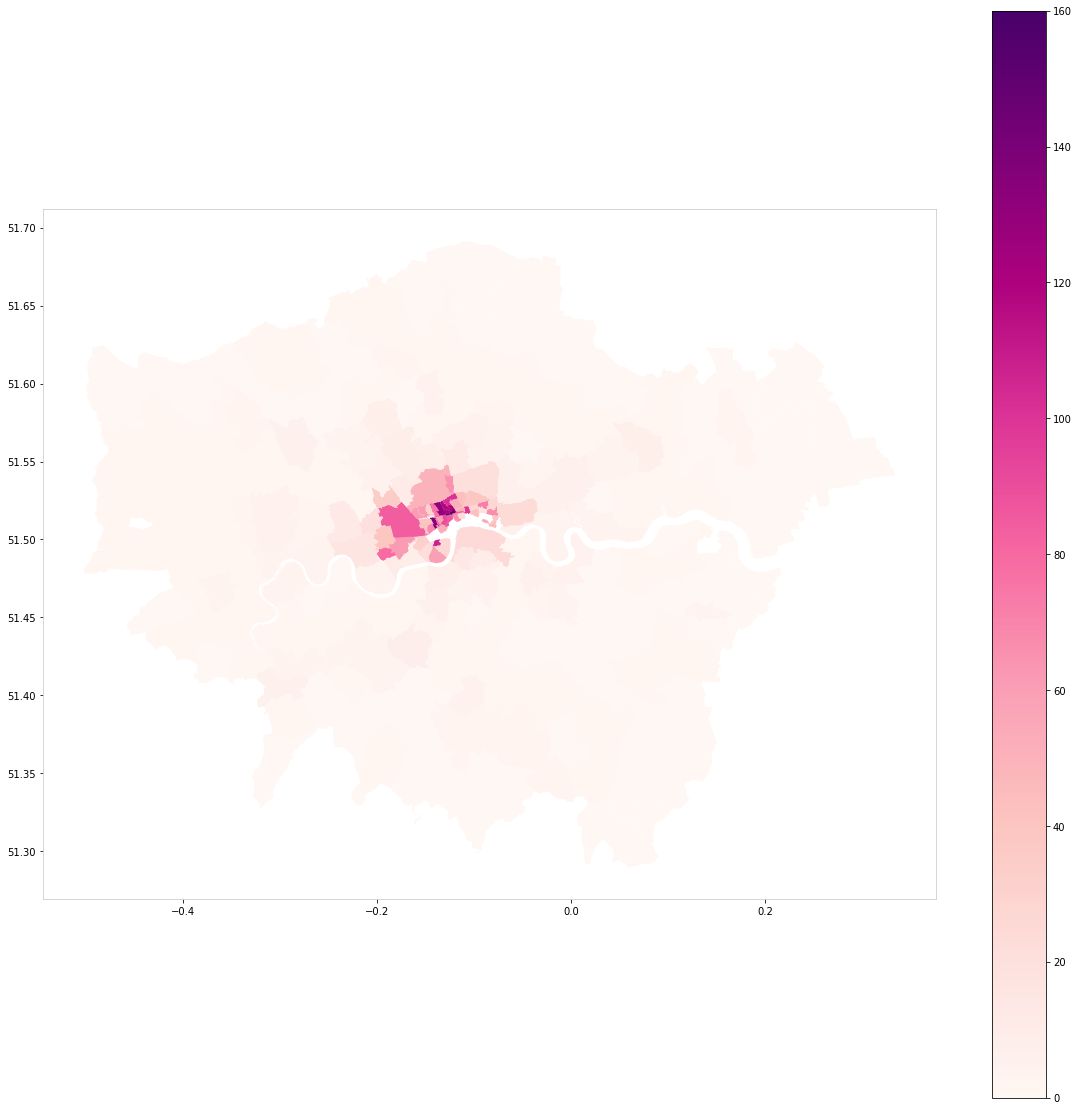

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
postcode_merge_price.plot(column='AccommodationAccess15m', ax=ax, legend=True, cmap='RdPu', linewidth=0.8)
plt.setp(ax.spines.values(), color='0.8')  # 设置边缘颜色
plt.show()

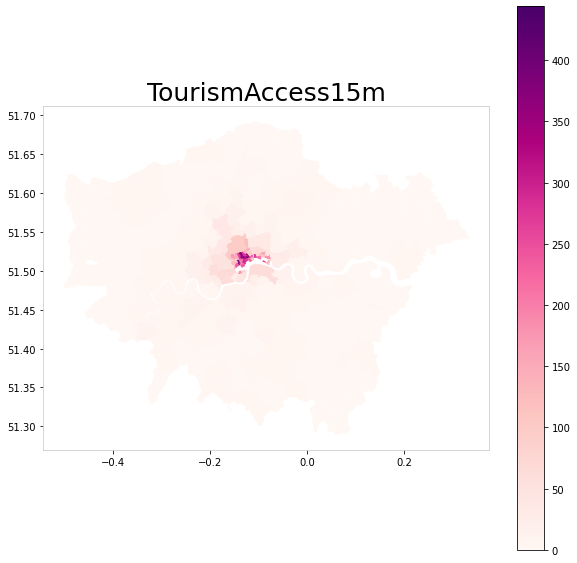

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
postcode_merge_price.plot(column='TourismAccess15m', ax=ax, legend=True, cmap='RdPu', linewidth=0.8)
plt.setp(ax.spines.values(), color='0.8')  # 设置边缘颜色
ax.set_title('TourismAccess15m', fontdict={'fontsize': '25', 'fontweight' : '3'})

plt.show()

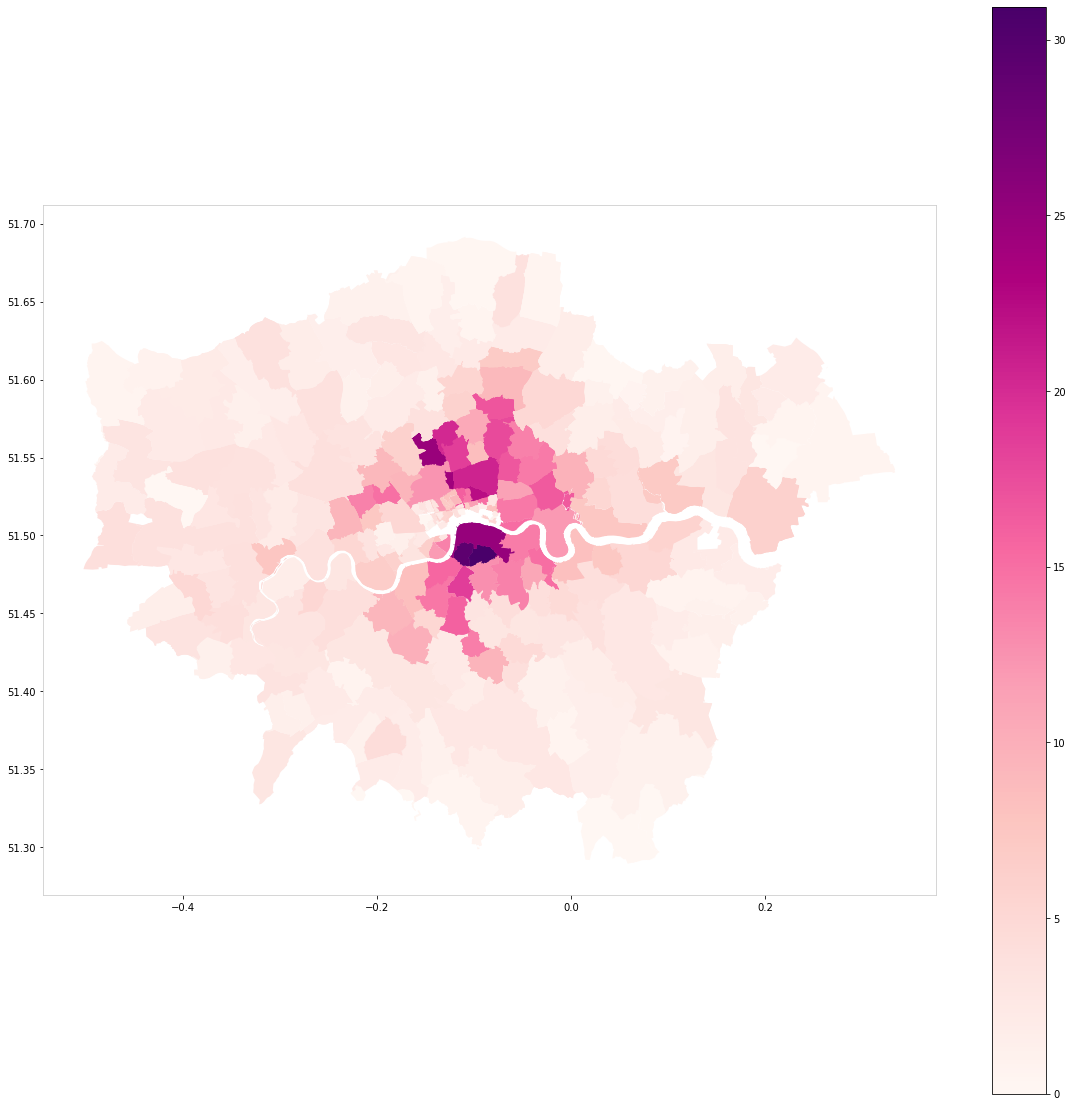

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
postcode_merge_price.plot(column='Green parkAccess15m', ax=ax, legend=True, cmap='RdPu', linewidth=0.8)
plt.setp(ax.spines.values(), color='0.8')  # 设置边缘颜色
plt.show()

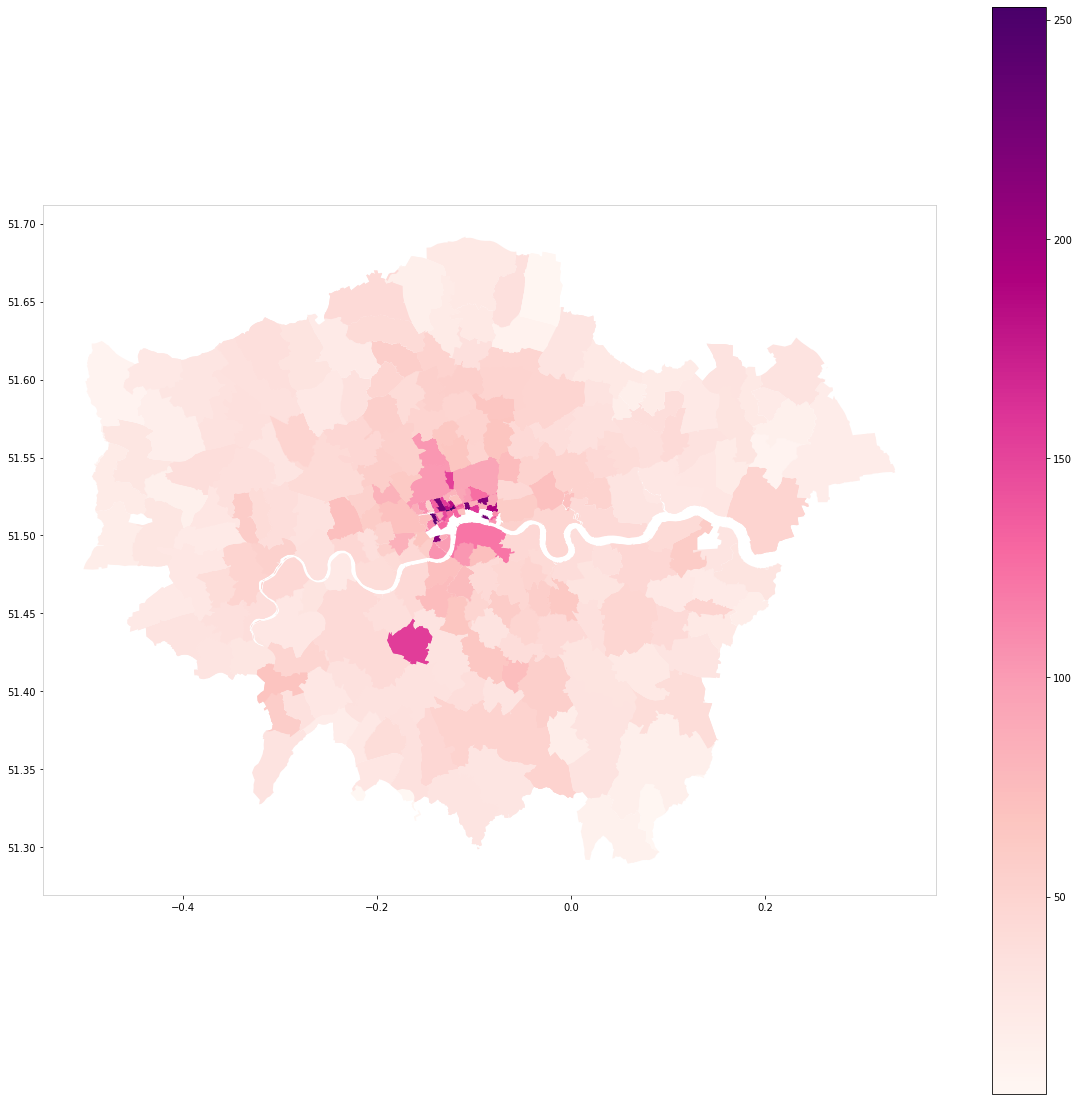

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
postcode_merge_price.plot(column='Bus stopAccess15m', ax=ax, legend=True, cmap='RdPu', linewidth=0.8)
plt.setp(ax.spines.values(), color='0.8')  # 设置边缘颜色
plt.show()

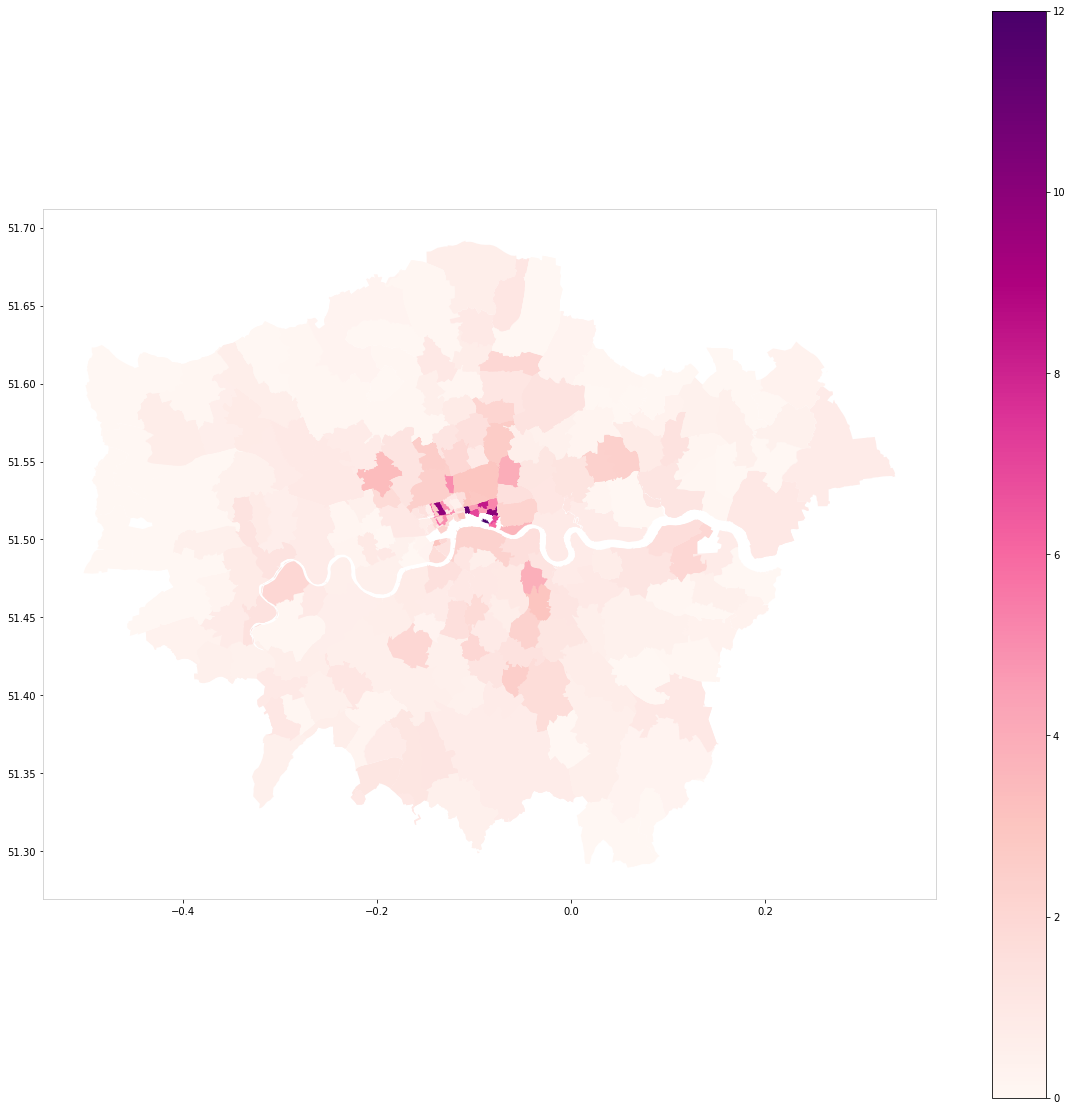

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
postcode_merge_price.plot(column='Railway stationsAccess15m', ax=ax, legend=True, cmap='RdPu', linewidth=0.8)
plt.setp(ax.spines.values(), color='0.8')  # 设置边缘颜色
plt.show()

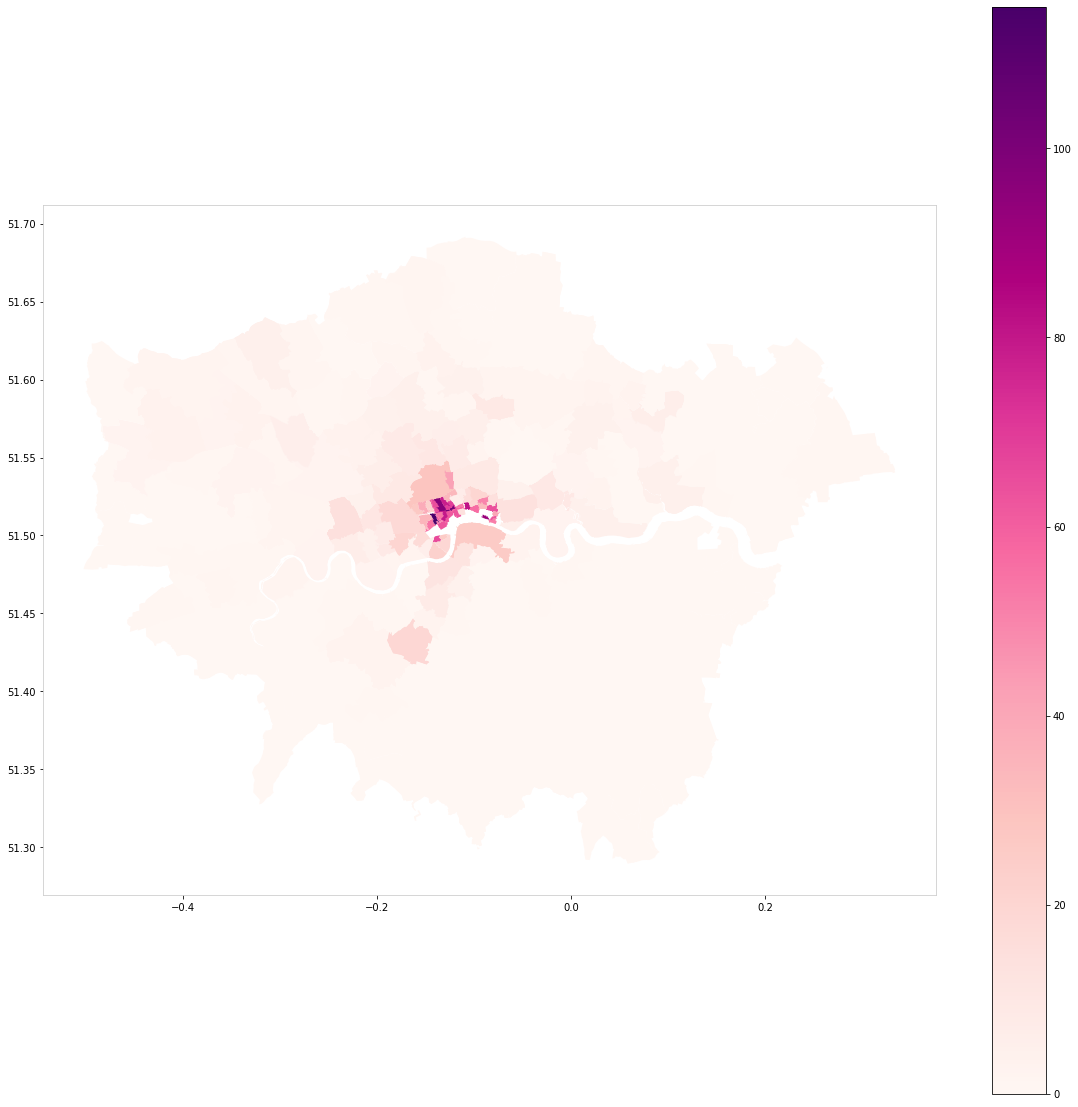

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
postcode_merge_price.plot(column='Underground entranceAccess15m', ax=ax, legend=True, cmap='RdPu', linewidth=0.8)
plt.setp(ax.spines.values(), color='0.8')  # 设置边缘颜色
plt.show()

---
column分为了6个大类，把每个大类的子图画在一张大图上，一共6个大图

Education: 'EducationAccess15m'
Health: 'HealthAccess15m'
Natural: 'Green parkAccess15m','Bodies of waterAccess15m'
Commercial:'Manufacturing and productionAccess15m'
Cultural: 'CultureAccess15m', 'TourismAccess15m'
Service: ’AccommodationAccess15m', 'AirportsAccess15m', 'Eating and drinkingAccess15m', 'ShoppingAccess15m', 'Commercial servicesAccess15m', 'Bus stopAccess15m', 'EntertainmentAccess15m', 'GamblingAccess15m', 'Public infrastructureAccess15m', 'Railway stationsAccess15m', 'SportsAccess15m', 'TourismAccess15m', 'Underground entranceAccess15m'


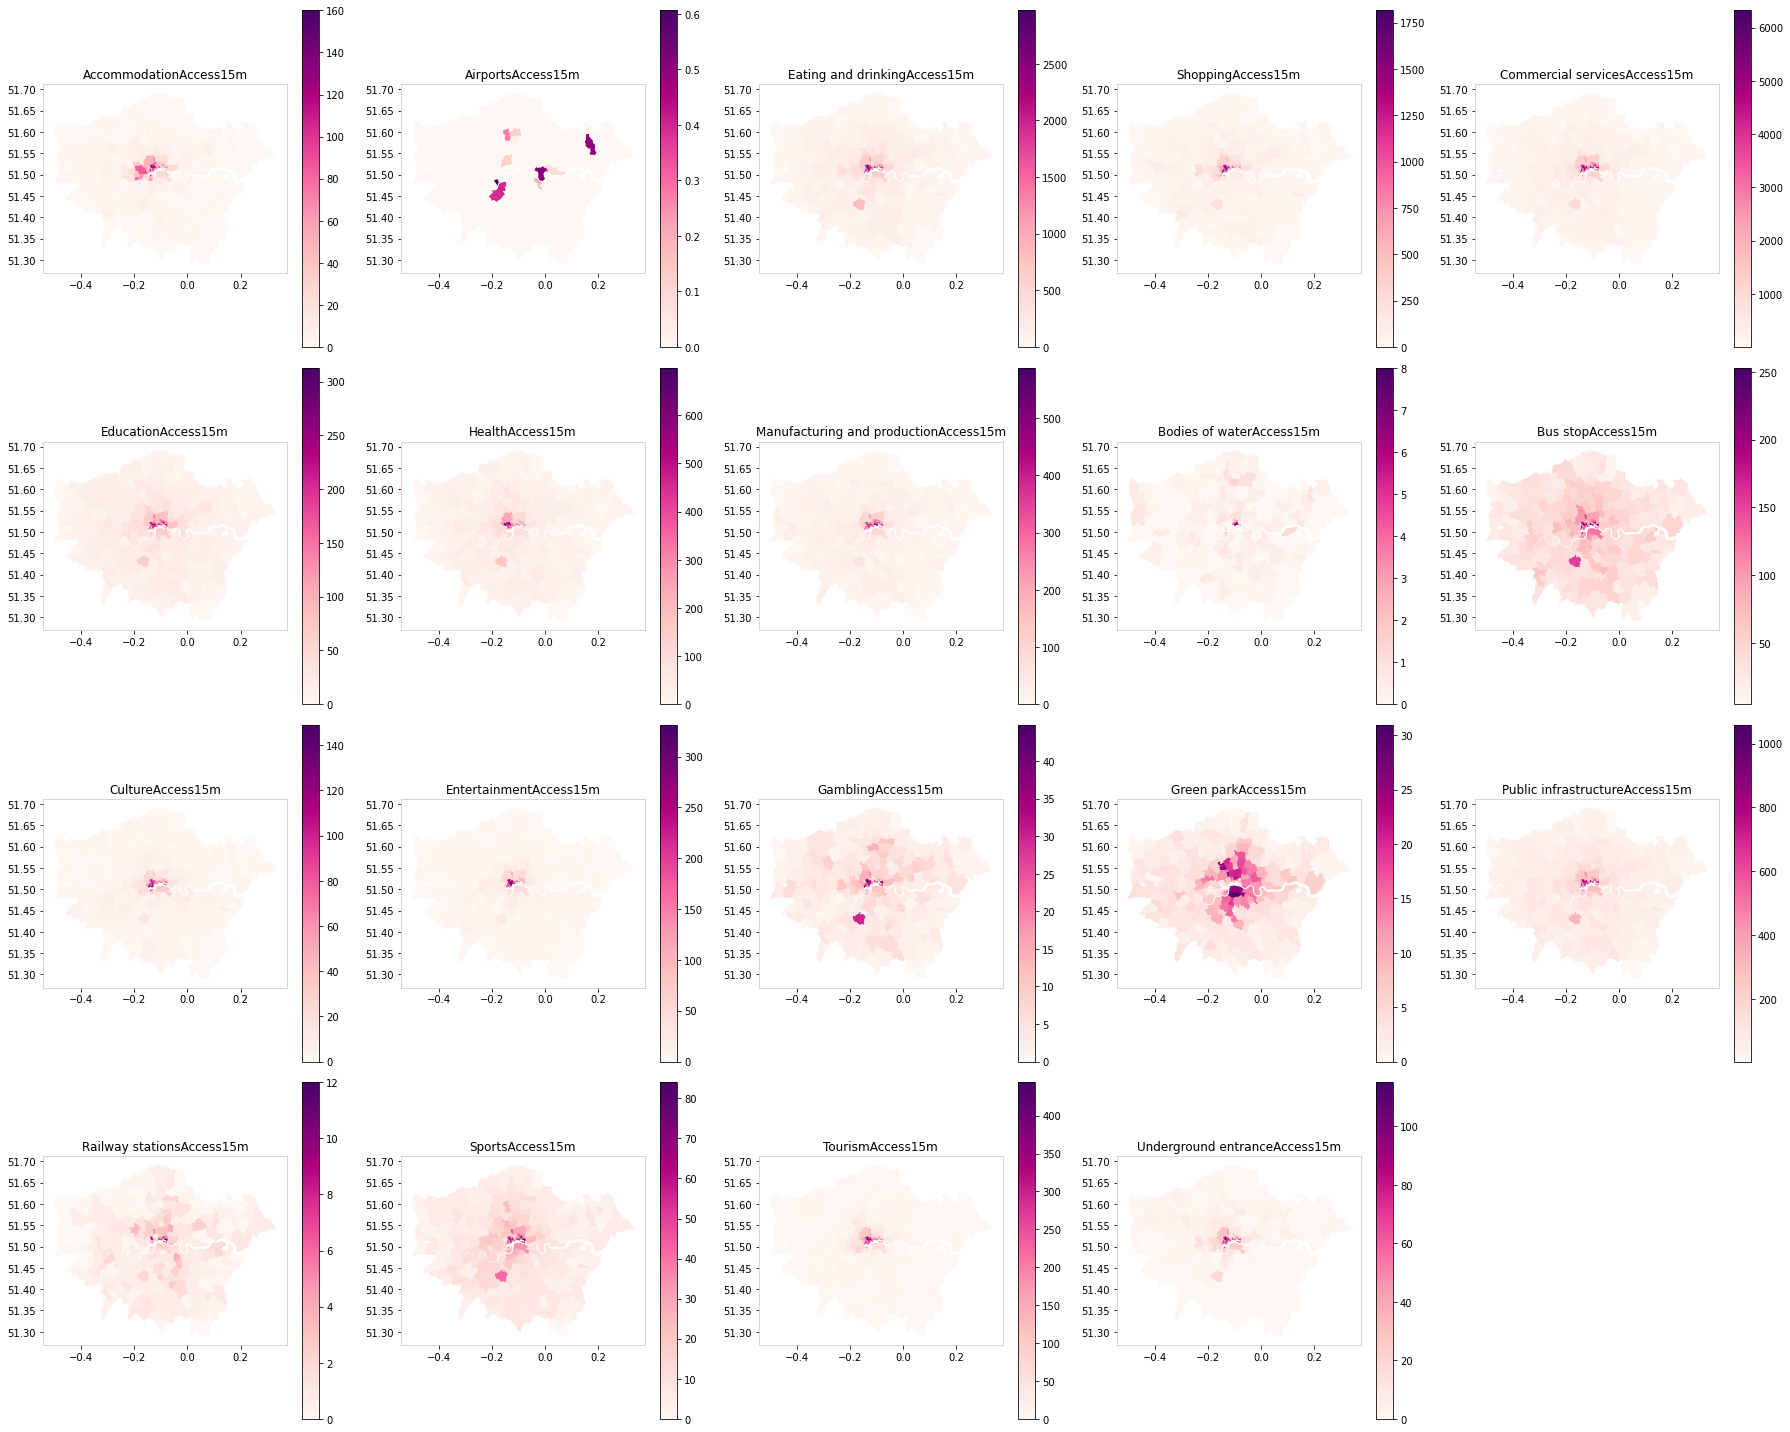

In [108]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# 加载文件和数据预处理
# ... [你之前的数据加载和预处理代码]

# 找到所有以 'Access15m' 结尾的列
access_columns = [col for col in grouped_geo_df.columns if col.endswith('Access15m')]

# 创建subplot的布局
fig, axs = plt.subplots(4, 5, figsize=(25, 20))  # 4x5 grid
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # 调整子图间的空间

# 为每个 'Access15m' 列绘制子图
for ax, col in zip(axs.ravel(), access_columns):
    postcode_merge_price.plot(column=col, ax=ax, legend=True, cmap='RdPu', linewidth=0.8)
    ax.set_title(col)
    plt.setp(ax.spines.values(), color='0.8')

# 隐藏剩余的子图（如果有）
for ax in axs.ravel()[len(access_columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


---

把平均值df保存，然后跑xgb

In [146]:
# grouped_geo_df.to_csv(r"D:\POI data\729_acc\730reclass3_grouped_byPost.csv", index=False)

---

geo_df groupby PostDist,然后计算每个PostDist的质心点，把质心点的经纬度保存为center_lat和center_lon列：按 'PostDist' 列对 geo_df 进行分组，然后使用 GeoPandas 的 centroid 属性计算每组的几何中心

In [175]:
df = pd.read_csv(r"D:\POI data\729_acc\729reclass3_add_post_byShp.csv")

# 创建一个由Point对象组成的列
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]

# 转换DataFrame为GeoDataFrame
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# 对 geo_df 按 'PostDist' 列进行分组
grouped = geo_df.groupby('PostDist')

# 计算每组的几何中心，并将结果转换为 DataFrame
center_points = grouped.geometry.apply(lambda x: MultiPoint(x.tolist()).centroid).to_frame()

# 从几何中心中提取经纬度，并保存到新的列中
center_points['center_lon'] = center_points.geometry.x
center_points['center_lat'] = center_points.geometry.y

# 你可以选择合并回原数据集
merged = pd.merge(geo_df, center_points[['center_lon', 'center_lat']], left_on='PostDist', right_index=True)
merged.to_csv(r"D:\POI data\729_acc\730reclass3_addcenter_byPost.csv", index=False)

In [176]:
merged.columns

Index(['price', 'address', 'property_type', 'bedrooms', 'bathrooms',
       'size_square_meters', 'lat', 'lon', 'borough', 'Price_per_square_meter',
       'tenure', 'garden', 'AccommodationAccess15m', 'AirportsAccess15m',
       'Eating and drinkingAccess15m', 'ShoppingAccess15m',
       'Commercial servicesAccess15m', 'EducationAccess15m', 'HealthAccess15m',
       'Manufacturing and productionAccess15m', 'id',
       'Bodies of waterAccess15m', 'Bus stopAccess15m', 'CultureAccess15m',
       'EntertainmentAccess15m', 'GamblingAccess15m', 'Green parkAccess15m',
       'Public infrastructureAccess15m', 'Railway stationsAccess15m',
       'SportsAccess15m', 'TourismAccess15m', 'Underground entranceAccess15m',
       'distance_to_center', 'postcode', 'PostDist', 'geometry', 'center_lon',
       'center_lat'],
      dtype='object')

In [178]:
columns_to_drop = ['address', 'borough', 'postcode','lat','lon', 'property_type', 'tenure', 'geometry']  # 请将 'column1', 'column2', 'column3' 替换为你实际的列名

merged_average = merged.drop(columns=columns_to_drop)
merged_average.columns

Index(['price', 'bedrooms', 'bathrooms', 'size_square_meters',
       'Price_per_square_meter', 'garden', 'AccommodationAccess15m',
       'AirportsAccess15m', 'Eating and drinkingAccess15m',
       'ShoppingAccess15m', 'Commercial servicesAccess15m',
       'EducationAccess15m', 'HealthAccess15m',
       'Manufacturing and productionAccess15m', 'id',
       'Bodies of waterAccess15m', 'Bus stopAccess15m', 'CultureAccess15m',
       'EntertainmentAccess15m', 'GamblingAccess15m', 'Green parkAccess15m',
       'Public infrastructureAccess15m', 'Railway stationsAccess15m',
       'SportsAccess15m', 'TourismAccess15m', 'Underground entranceAccess15m',
       'distance_to_center', 'PostDist', 'center_lon', 'center_lat'],
      dtype='object')

In [179]:

merged_average = merged_average.groupby('PostDist').mean()
merged_average.columns 




Index(['price', 'bedrooms', 'bathrooms', 'size_square_meters',
       'Price_per_square_meter', 'garden', 'AccommodationAccess15m',
       'AirportsAccess15m', 'Eating and drinkingAccess15m',
       'ShoppingAccess15m', 'Commercial servicesAccess15m',
       'EducationAccess15m', 'HealthAccess15m',
       'Manufacturing and productionAccess15m', 'id',
       'Bodies of waterAccess15m', 'Bus stopAccess15m', 'CultureAccess15m',
       'EntertainmentAccess15m', 'GamblingAccess15m', 'Green parkAccess15m',
       'Public infrastructureAccess15m', 'Railway stationsAccess15m',
       'SportsAccess15m', 'TourismAccess15m', 'Underground entranceAccess15m',
       'distance_to_center', 'center_lon', 'center_lat'],
      dtype='object')

In [ ]:

merged_average.to_csv(r"D:\POI data\729_acc\730reclass3_addcenter_average.csv", index=False)

---

画一个distance to underground的图

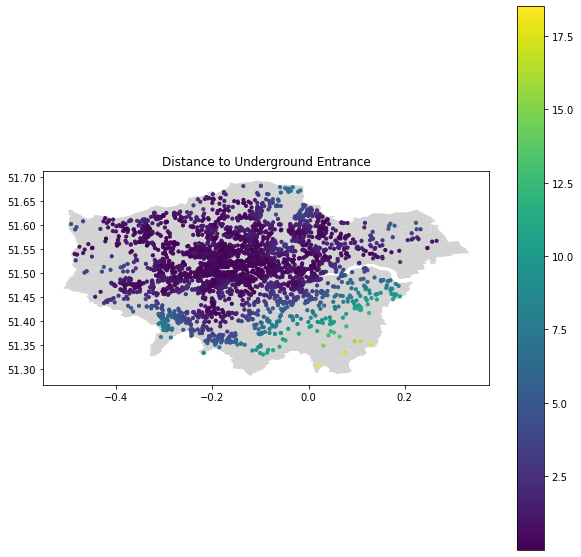

In [28]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
map_postcodes = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\clipped_postcodes.shp")
df = pd.read_csv(r"D:\POI data\810_acc\reclass3_add_distanceTounderground.csv")

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
map_postcodes.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=10, column='distance_to_underground_entrance', legend=True, cmap='viridis')

# Set title and show the plot
ax.set_title("Distance to Underground Entrance")
plt.show()


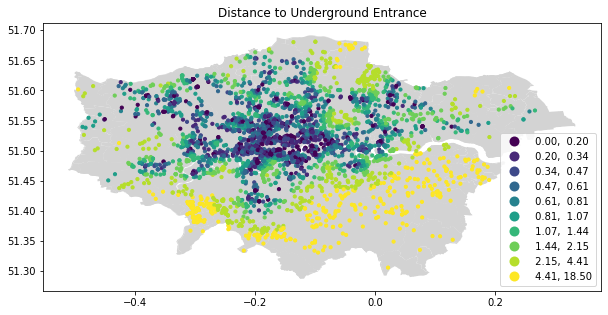

In [31]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify

# Read the data
map_postcodes = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\clipped_postcodes.shp")
df = pd.read_csv(r"D:\POI data\810_acc\reclass3_add_distanceTounderground.csv")

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
map_postcodes.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=10, column='distance_to_underground_entrance', legend=True, cmap='viridis', 
         scheme='quantiles', k=10)  # Here, 'k' specifies the number of quantiles. Adjust as needed.

# Set title and show the plot
ax.set_title("Distance to Underground Entrance")
plt.show()


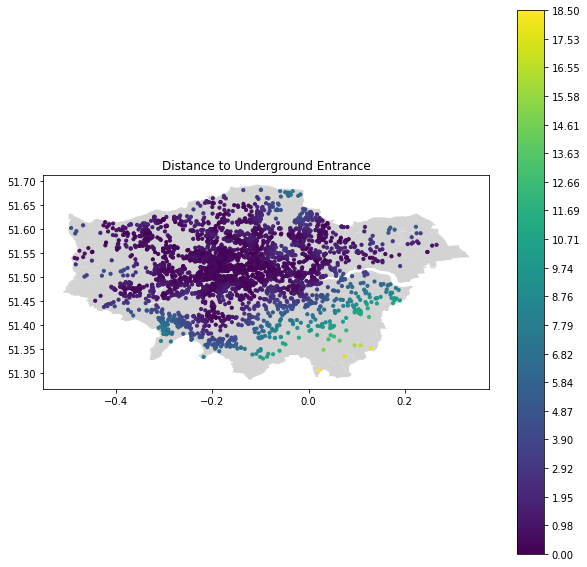

In [30]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
map_postcodes = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\clipped_postcodes.shp")
df = pd.read_csv(r"D:\POI data\810_acc\reclass3_add_distanceTounderground.csv")

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

# Define color breaks
min_val = df['distance_to_underground_entrance'].min()
max_val = df['distance_to_underground_entrance'].max()
breaks = np.linspace(min_val, max_val, 20)  # 11 breaks will create 10 equal intervals

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
map_postcodes.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=10, column='distance_to_underground_entrance', legend=True, cmap='viridis', 
         legend_kwds={'ticks': breaks})

# Set title and show the plot
ax.set_title("Distance to Underground Entrance")
plt.show()


c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\84398\AppData\Local\Temp/ipykernel_3176/3463027747.py:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf = gpd.sjoin(gdf, map_postcodes, how="inner", op="within")


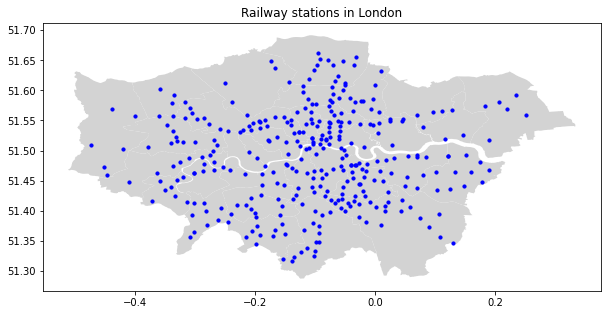

In [40]:
# Read the CSV file
df = pd.read_csv(r"D:\POI data\poi_cleaned_data\728_changeclass_transportation_poi_Id.csv")

# Filter rows where 'Underground entrance' is 1
underground_entrances = df[df['Railway stations'] == 1]

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(underground_entrances, geometry=gpd.points_from_xy(underground_entrances.lon, underground_entrances.lat))

# Read the London map
map_postcodes = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\london_boundary.shp")

# Perform a spatial join to filter only the points within the London map
gdf = gpd.sjoin(gdf, map_postcodes, how="inner", op="within")

# Plot the points on the map of London
fig, ax = plt.subplots(figsize=(10, 10))
map_postcodes.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=10, color='blue')
ax.set_title("Railway stations in London")
plt.show()

c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\84398\AppData\Local\Temp/ipykernel_3176/555637782.py:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf = gpd.sjoin(gdf, map_postcodes, how="inner", op="within")


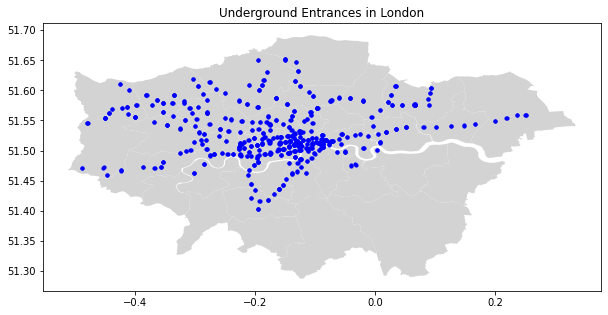

In [41]:
# Read the CSV file
df = pd.read_csv(r"D:\POI data\poi_cleaned_data\814_changeclass_transportation_poi.csv")

# Filter rows where 'Underground entrance' is 1
underground_entrances = df[df['Underground entrance'] == 1]

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(underground_entrances, geometry=gpd.points_from_xy(underground_entrances.lon, underground_entrances.lat))

# Read the London map
map_postcodes = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\london_boundary.shp")

# Perform a spatial join to filter only the points within the London map
gdf = gpd.sjoin(gdf, map_postcodes, how="inner", op="within")

# Plot the points on the map of London
fig, ax = plt.subplots(figsize=(10, 10))
map_postcodes.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=10, color='blue')
ax.set_title("Underground Entrances in London")
plt.show()

c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\84398\AppData\Local\Temp/ipykernel_26292/2557340943.py:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf = gpd.sjoin(gdf, map_postcodes, how="inner", op="within")


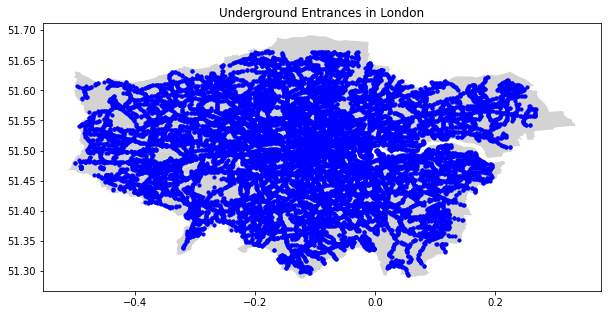

In [17]:
# Read the CSV file
df = pd.read_csv(r"D:\POI data\poi_cleaned_data\814_changeclass_transportation_poi.csv")

# Filter rows where 'Underground entrance' is 1
underground_entrances = df[df['Bus stop'] == 1]

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(underground_entrances, geometry=gpd.points_from_xy(underground_entrances.lon, underground_entrances.lat))

# Read the London map
map_postcodes = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\london_boundary.shp")

# Perform a spatial join to filter only the points within the London map
gdf = gpd.sjoin(gdf, map_postcodes, how="inner", op="within")

# Plot the points on the map of London
fig, ax = plt.subplots(figsize=(10, 10))
map_postcodes.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=10, color='blue')
ax.set_title("Underground Entrances in London")
plt.show()

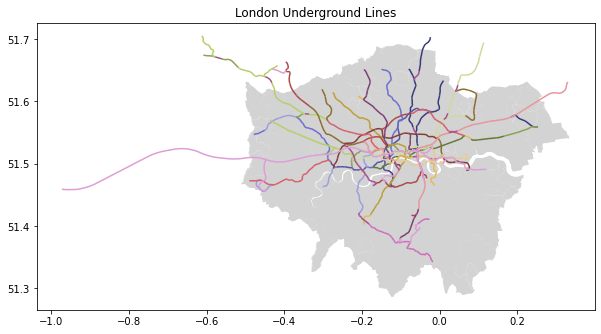

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the London map
map_postcodes = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\clipped_postcodes.shp")

# Load the London Underground lines Shapefile
underground_lines = gpd.read_file(r"D:\大五上\casa0003可视化\practical\week2\Practical 2 Data and Examples 2022-23\TfL_lines_update\TfL_lines_update.shp")

# Plot the map of London with the Underground lines
fig, ax = plt.subplots(figsize=(10, 10))
map_postcodes.plot(ax=ax, color='lightgrey')
underground_lines.plot(ax=ax, linewidth=1.5, cmap='tab20b')  # Using a colormap to differentiate lines
ax.set_title("London Underground Lines")
plt.show()


There are almost no underground lines or underground station entrances in south-east London, more railway stations

c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


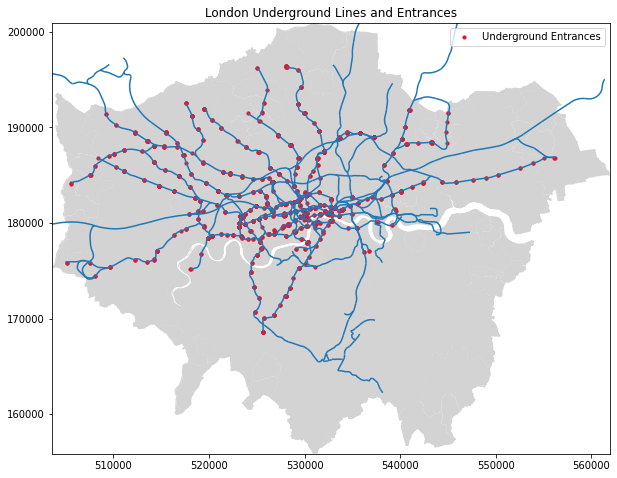

In [106]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the London map
map_postcodes = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\clipped_postcodes.shp").to_crs(epsg=27700)

# Load the London Underground lines Shapefile and convert its CRS
underground_lines = gpd.read_file(r"D:\大五上\casa0003可视化\practical\week2\Practical 2 Data and Examples 2022-23\TfL_lines_update\TfL_lines_update.shp").to_crs(epsg=27700)

# Load the CSV file and filter rows where 'Underground entrance' is 1
poi_data = pd.read_csv(r"D:\POI data\poi_cleaned_data\728_changeclass_transportation_poi_Id.csv")
underground_entrances = poi_data[poi_data['Underground entrance'] == 1]

# Convert the DataFrame to a GeoDataFrame
geometry = gpd.points_from_xy(underground_entrances.lon, underground_entrances.lat)
underground_entrances_gdf = gpd.GeoDataFrame(underground_entrances, geometry=geometry, crs="EPSG:4326")  # Assume initial CRS is WGS84

# Convert the GeoDataFrame's CRS to match the map
underground_entrances_gdf = underground_entrances_gdf.to_crs(epsg=27700)

# Use spatial join to filter only the points that are within the London map boundaries
underground_entrances_within_map = gpd.sjoin(underground_entrances_gdf, map_postcodes, how="inner", op="within")

# Plot the map of London with the Underground lines and entrances
fig, ax = plt.subplots(figsize=(10, 10))
map_postcodes.plot(ax=ax, color='lightgrey')
underground_lines.plot(ax=ax, linewidth=1.5)  # Using a colormap to differentiate lines
underground_entrances_within_map.plot(ax=ax, markersize=10, color='#DD172F', label='Underground Entrances')

# Set the plotting limits to match the extent of the map_postcodes
minx, miny, maxx, maxy = map_postcodes.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

ax.set_title("London Underground Lines and Entrances")
ax.legend()
plt.show()


c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\84398\AppData\Local\Temp/ipykernel_26292/3470020485.py:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf = gpd.sjoin(gdf, map_postcodes, how="inner", op="within")


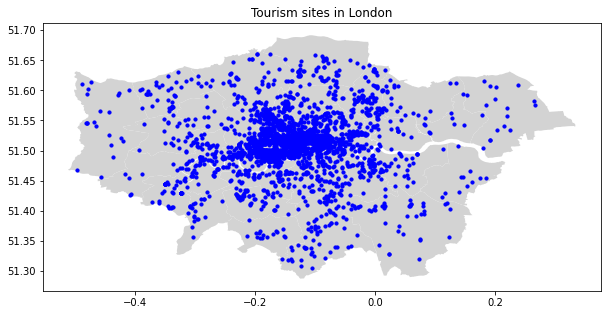

In [4]:
# Read the CSV file
df = pd.read_csv(r"D:\POI data\poi_cleaned_data\728_changeclass_7acc_poi_Id.csv")

# Filter rows where 'Underground entrance' is 1
underground_entrances = df[df['Tourism'] == 1]

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(underground_entrances, geometry=gpd.points_from_xy(underground_entrances.lon, underground_entrances.lat))

# Read the London map
map_postcodes = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\london_boundary.shp")

# Perform a spatial join to filter only the points within the London map
gdf = gpd.sjoin(gdf, map_postcodes, how="inner", op="within")

# Plot the points on the map of London
fig, ax = plt.subplots(figsize=(10, 10))
map_postcodes.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=10, color='blue')
ax.set_title("Tourism sites in London")
plt.show()

c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\84398\AppData\Local\Temp/ipykernel_26292/2470545265.py:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf = gpd.sjoin(gdf, map_postcodes, how="inner", op="within")


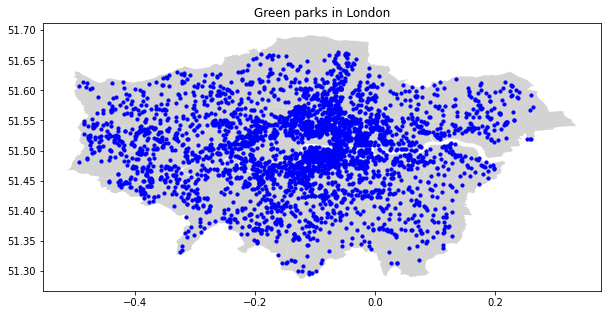

In [11]:
# Read the CSV file
df = pd.read_csv(r"D:\POI data\poi_cleaned_data\728_changeclass_7acc_poi_Id.csv")

# Filter rows where 'Underground entrance' is 1
underground_entrances = df[df['Green park'] == 1]

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(underground_entrances, geometry=gpd.points_from_xy(underground_entrances.lon, underground_entrances.lat))

# Read the London map
map_postcodes = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\london_boundary.shp")

# Perform a spatial join to filter only the points within the London map
gdf = gpd.sjoin(gdf, map_postcodes, how="inner", op="within")

# Plot the points on the map of London
fig, ax = plt.subplots(figsize=(10, 10))
map_postcodes.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=10, color='blue')
ax.set_title("Green parks in London")
plt.show()

c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\84398\AppData\Local\Temp/ipykernel_26292/1490522897.py:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf = gpd.sjoin(gdf, map_postcodes, how="inner", op="within")


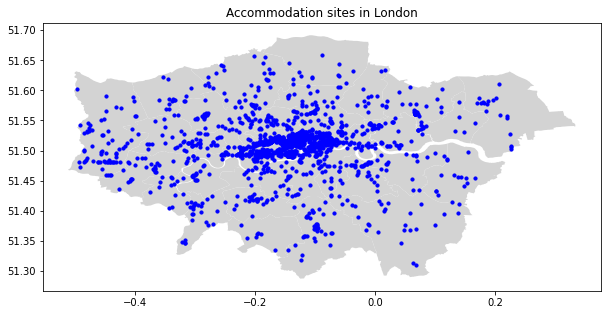

In [10]:
# Read the CSV file
df = pd.read_csv(r"D:\POI data\poi_cleaned_data\poi_has_classes.csv")

# Filter rows where 'Underground entrance' is 1
underground_entrances = df[df['Accommodation'] == 1]

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(underground_entrances, geometry=gpd.points_from_xy(underground_entrances.lon, underground_entrances.lat))

# Read the London map
map_postcodes = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\london_boundary.shp")

# Perform a spatial join to filter only the points within the London map
gdf = gpd.sjoin(gdf, map_postcodes, how="inner", op="within")

# Plot the points on the map of London
fig, ax = plt.subplots(figsize=(10, 10))
map_postcodes.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=10, color='blue')
ax.set_title("Accommodation sites in London")
plt.show()